# Software Developers Salaries Analysis Project

## Introduction : 

###### *  The Data Used in this Analysis is based on an online survey from 181 different Countries about Software Developer Salaries
###### * The overall  goal of this Analysis is to EXPLORE and PREDICT the average Annual Salary of Software Developers around the world, Find out which software tools are widely used by High Paid Software Roles ( Operating Systems , Programming Languages ,  Managment Information Systems , Web Frame Works ) .

###### *  I started by Exploring the raw data , Then did some preprocessing  ( cleaning ) like dealing with missing values and featured new columns that didnt exist in the raw data to help me get new insight out of the data.



###### * At the end , I used RandomForestRegressor to predict the annual salary based on some features.

### Importing Essential Libraries

In [135]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import timeit
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.feature_selection import RFECV
from category_encoders import BinaryEncoder
from sklearn.ensemble import RandomForestRegressor
from pycaret.regression import *
import plotly.express as px
from sklearn.compose import ColumnTransformer

In [136]:
#!pip install pycaret

In [137]:
#!pip install markupsafe==2.0.1

In [138]:
#!pip install plotly

### Reading Data from CSV file

In [139]:
RawData = pd.read_csv('survey_results_public.csv')

In [140]:
pd.set_option('display.max_columns', 100)

In [141]:
pd.options.display.float_format = '{:.2f}'.format

### Saving a copy of the data


In [142]:
df = RawData.copy()

## Exploring the data 

In [143]:
df.shape

(83439, 48)

In [144]:
df.describe()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.00,47183.00,46844.00
mean,41720.00,21194074136871328176358896618385873754265419677...,118426.15
std,24086.91,46037022206959015785285187855167055576782594803...,527294.36
min,1.00,0.00,1.00
25%,20860.50,16000.00,27025.00
50%,41720.00,67000.00,56211.00
75%,62579.50,140000.00,100000.00
max,83439.00,99999999999999995164818811802792197885196090803...,45241312.00


In [145]:
df.head(3)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.00,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.00
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [147]:
 df.isna().sum()

ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWorkedWith          21732
WebframeWantToWorkWith          31344
MiscTechHaveWorkedWith          36384
MiscTechWantToWorkWith          45418
ToolsTechHav

In [148]:
df.dropna(subset=['ConvertedCompYearly'],inplace=True)

In [149]:
df.drop(columns = ['US_State','UK_Country','Age1stCode','LearnCode','YearsCode','LanguageWantToWorkWith','DatabaseWantToWorkWith',
                  'PlatformWantToWorkWith','WebframeWantToWorkWith','MiscTechWantToWorkWith','ToolsTechWantToWorkWith',
                  'NEWCollabToolsWantToWorkWith','NEWStuck','NEWSOSites','SOVisitFreq','SOAccount','SOPartFreq','SOComm','NEWOtherComms',
                  'Trans','Sexuality','Accessibility','MentalHealth','SurveyLength','SurveyEase','CompTotal','CompFreq'],axis = 1
        ,inplace=True)

In [150]:
#df.drop(columns = ['US_State','UK_Country','Age1stCode','LearnCode','YearsCode','LanguageHaveWorkedWith',
                  #'LanguageWantToWorkWith','DatabaseHaveWorkedWith','DatabaseWantToWorkWith',
                  #,'PlatformHaveWorkedWith','PlatformWantToWorkWith','WebframeHaveWorkedWith','WebframeWantToWorkWith'
                  #,'MiscTechHaveWorkedWith','MiscTechWantToWorkWith','ToolsTechHaveWorkedWith','ToolsTechWantToWorkWith',
                 # 'NEWCollabToolsHaveWorkedWith','NEWCollabToolsWantToWorkWith','OpSys','NEWStuck',
                 # 'NEWSOSites','SOVisitFreq','SOAccount','SOPartFreq','SOComm','NEWOtherComms',
                 # 'Trans','Sexuality','Accessibility','MentalHealth','SurveyLength','SurveyEase','CompTotal','CompFreq']
        #,inplace=True,axis =1)

In [151]:
df.isna().sum()

ResponseId                          0
MainBranch                          0
Employment                         13
Country                             0
EdLevel                            21
YearsCodePro                      453
DevType                            93
OrgSize                            52
Currency                            0
LanguageHaveWorkedWith            151
DatabaseHaveWorkedWith           5484
PlatformHaveWorkedWith          14149
WebframeHaveWorkedWith           9598
MiscTechHaveWorkedWith          20432
ToolsTechHaveWorkedWith          3797
NEWCollabToolsHaveWorkedWith      515
OpSys                              18
Age                               109
Gender                            175
Ethnicity                         901
ConvertedCompYearly                 0
dtype: int64

In [152]:
df.dropna(subset=['Ethnicity'],inplace=True)

In [153]:
df.dropna(how='any',inplace=True)

In [154]:
#df[df['Country'] == 'Egypt'][['OrgSize','Employment']]

### Exploring Employment Variable

In [155]:
df['Employment'].value_counts()

Employed full-time                                      13439
Independent contractor, freelancer, or self-employed     1832
Employed part-time                                        465
Name: Employment, dtype: int64

### Excluding all unwanted Employment types except Full-time , Part-time and Freelancers.

In [156]:
df.drop(df[df['Employment'] == 'Student, full-time'].index,inplace=True)
df.drop(df[df['Employment'] == 'Not employed, but looking for work'].index,inplace=True)
df.drop(df[df['Employment'] == 'Student, part-time'].index,inplace=True)
df.drop(df[df['Employment'] == 'I prefer not to say'].index,inplace=True)
df.drop(df[df['Employment'] == 'Not employed, and not looking for work'].index,inplace=True)
df.drop(df[df['Employment'] == 'Retired'].index,inplace=True)

### Exploring MainBranch Variable.

In [157]:
df['MainBranch'].value_counts()

I am a developer by profession                                                   14815
I am not primarily a developer, but I write code sometimes as part of my work      921
Name: MainBranch, dtype: int64

### Excluding all types of MainBranch except those who code professionaly as part of their jobs.

In [158]:
df.drop(df[df['MainBranch'] == 'I am a student who is learning to code'].index,inplace=True)
df.drop(df[df['MainBranch'] == 'I code primarily as a hobby'].index,inplace=True)
df.drop(df[df['MainBranch'] == 'None of these'].index,inplace=True)
df.drop(df[df['MainBranch'] == 'I used to be a developer by profession, but no longer am'].index,inplace=True)

### Excluding Edlevel entries with NaN values since their number is not significantly large.

In [159]:
#df[df['EdLevel'].isna()==True][['ConvertedCompYearly','DevType']].isna().sum()
df.dropna(subset = ['EdLevel'],inplace=True)

In [160]:
df.isna().sum()

ResponseId                      0
MainBranch                      0
Employment                      0
Country                         0
EdLevel                         0
YearsCodePro                    0
DevType                         0
OrgSize                         0
Currency                        0
LanguageHaveWorkedWith          0
DatabaseHaveWorkedWith          0
PlatformHaveWorkedWith          0
WebframeHaveWorkedWith          0
MiscTechHaveWorkedWith          0
ToolsTechHaveWorkedWith         0
NEWCollabToolsHaveWorkedWith    0
OpSys                           0
Age                             0
Gender                          0
Ethnicity                       0
ConvertedCompYearly             0
dtype: int64

In [161]:
#df['EdLevel'].value_counts()

In [162]:
#df['EdLevel'].isna().sum()

### Exploring YearsCodePro variable.

In [163]:
df['YearsCodePro'].value_counts()

3                     1568
4                     1354
2                     1354
5                     1323
6                     1049
10                     989
7                      800
8                      787
1                      734
15                     592
Less than 1 year       579
9                      479
11                     441
12                     440
20                     416
13                     357
14                     296
16                     274
17                     213
25                     213
21                     192
18                     184
22                     178
23                     136
30                     123
24                     114
19                     110
26                      70
27                      49
28                      45
35                      38
33                      35
32                      31
31                      30
29                      28
36                      25
34                      21
4

### Changing 2 of the Text classes within YearsCodePro variable

In [164]:
df.loc[df['YearsCodePro'] == "Less than 1 year","YearsCodePro"] = 0
df.loc[df['YearsCodePro'] == "More than 50 years","YearsCodePro"] = 51

In [165]:
#df.dropna(subset = ['YearsCodePro'],inplace=True)
df['Age']

16       25-34 years old
45       35-44 years old
50       25-34 years old
58       25-34 years old
64       35-44 years old
              ...       
83428    25-34 years old
83431    18-24 years old
83432    18-24 years old
83436    25-34 years old
83437    25-34 years old
Name: Age, Length: 15736, dtype: object

In [166]:
df.loc[df['Age'] == "Prefer not to say","Age"] = df['Age'].mode()

In [167]:
df.dropna(subset=['Age'],inplace=True)

In [168]:
convert_dict = {'YearsCodePro': int}
 
df = df.astype(convert_dict)

In [169]:
list(df['Country'].unique())

['Turkey',
 'Brazil',
 'Greece',
 'Russian Federation',
 'United States of America',
 'Poland',
 'Canada',
 'Switzerland',
 'Hungary',
 'United Kingdom of Great Britain and Northern Ireland',
 'Germany',
 'France',
 'Nigeria',
 'Italy',
 'Bangladesh',
 'Netherlands',
 'Romania',
 'Ukraine',
 'Slovenia',
 'Egypt',
 'Colombia',
 'India',
 'Australia',
 'Indonesia',
 'Iran, Islamic Republic of...',
 'Denmark',
 'Armenia',
 'Argentina',
 'Sweden',
 'Spain',
 'United Arab Emirates',
 'Portugal',
 'Austria',
 'South Africa',
 'Pakistan',
 'Lebanon',
 'Serbia',
 'Bolivia',
 'Malta',
 'Finland',
 'Israel',
 'Georgia',
 'Belarus',
 'Kenya',
 'Czech Republic',
 'Botswana',
 'China',
 'Croatia',
 'Chile',
 'Syrian Arab Republic',
 'Zambia',
 'Tunisia',
 'Belgium',
 'Japan',
 'Sri Lanka',
 'Dominican Republic',
 'Iceland',
 'Morocco',
 'Ireland',
 'Uruguay',
 'Norway',
 'Lithuania',
 'Bulgaria',
 'Panama',
 'Ethiopia',
 'Cuba',
 "Lao People's Democratic Republic",
 'Thailand',
 'Mexico',
 'Republi

In [170]:
#for country in list(df['Country'].unique()):
  #  dfx = df[df['Country'] == country]
   # valueForImputation = df.loc[df['Country'] == country,'EdLevel'].mode()
   # df.drop(df[df['Country'] == country].index,inplace=True)
   # dfx['EdLevel'].fillna(value = dfx['EdLevel'].mode()[0], inplace = True)
   # df = pd.concat([df,dfx])
#df['EdLevel'].isna().sum()    

### Filling Nan values of Ethnicity according to the majority of ethnicity in each Country.

In [171]:
#for country in list(df['Country'].unique()):
    #dfx = df[df['Country'] == country]
    #valueForImputation = df.loc[df['Country'] == country,'Ethnicity'].mode()
    #df.drop(df[df['Country'] == country].index,inplace=True)
    #dfx['Ethnicity'].fillna(value = dfx['Ethnicity'].mode()[0], inplace = True)
    #df = pd.concat([df,dfx])
#df['Ethnicity'].isna().sum()   

In [172]:
#df['Ethnicity'].unique()

In [173]:
df.loc[df[df['Ethnicity'].str.contains("Middle Eastern")==True].index,'Ethnicity'] = 'Middle Eastern'
df.loc[df[df['Ethnicity'].str.contains("Black")==True].index,'Ethnicity'] = 'Black'
df.loc[df[df['Ethnicity'].str.contains("South Asian")==True].index,'Ethnicity'] = 'South Asian'
df.loc[df[df['Ethnicity'].str.contains("White")==True].index,'Ethnicity'] = 'White'
df.loc[df[df['Ethnicity'].str.contains("I don't know")==True].index,'Ethnicity'] = 'White'
df.loc[df[df['Ethnicity'].str.contains("Multiracial")==True].index,'Ethnicity'] = 'Multiracial'
df.loc[df[df['Ethnicity'].str.contains("Hispanic")==True].index,'Ethnicity'] = 'Hispanic'
df.loc[df[df['Ethnicity'].str.contains("Southeast Asian")==True].index,'Ethnicity'] = 'Southeast Asian'
df.loc[df[df['Ethnicity'].str.contains("Biracial")==True].index,'Ethnicity'] = 'Biracial'
df.loc[df[df['Ethnicity'].str.contains("East Asian")==True].index,'Ethnicity'] = 'East Asian'
df.loc[df[df['Ethnicity'].str.contains("Indigenous")==True].index,'Ethnicity'] = 'Indigenous'
df.loc[df[df['Ethnicity'].str.contains("Prefer not to say")==True].index,'Ethnicity'] = 'White'
df.loc[df[df['Ethnicity'].str.contains("Or, in your own words:")==True].index,'Ethnicity'] = 'White'

In [174]:
df['ConvertedCompYearly'].isna().sum()

0

In [175]:
df[df['OrgSize'].isna()==True][['ConvertedCompYearly','YearsCodePro','Employment']].isna().sum()

ConvertedCompYearly   0.00
YearsCodePro          0.00
Employment            0.00
dtype: float64

In [176]:
df['Gender'].value_counts()

Man                                                                                   14816
Woman                                                                                   536
Prefer not to say                                                                       116
Non-binary, genderqueer, or gender non-conforming                                        99
Or, in your own words:                                                                   45
Man;Non-binary, genderqueer, or gender non-conforming                                    38
Man;Or, in your own words:                                                               33
Woman;Non-binary, genderqueer, or gender non-conforming                                  20
Man;Woman                                                                                 6
Man;Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:        3
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

In [177]:
df['Currency'].unique()

array(['TRY\tTurkish lira', 'BRL\tBrazilian real', 'EUR European Euro',
       'RUB\tRussian ruble', 'USD\tUnited States dollar',
       'PLN\tPolish zloty', 'CAD\tCanadian dollar', 'CHF\tSwiss franc',
       'HUF\tHungarian forint', 'GBP\tPound sterling',
       'NGN\tNigerian naira', 'BDT\tBangladeshi taka',
       'RON\tRomanian leu', 'EGP\tEgyptian pound', 'INR\tIndian rupee',
       'AUD\tAustralian dollar', 'IDR\tIndonesian rupiah',
       'IRR\tIranian rial', 'DKK\tDanish krone', 'AMD\tArmenian dram',
       'SEK\tSwedish krona', 'AED United Arab Emirates dirham',
       'UAH\tUkrainian hryvnia', 'ZAR\tSouth African rand',
       'PKR\tPakistani rupee', 'ARS\tArgentine peso',
       'LBP\tLebanese pound', 'BOB\tBolivian boliviano',
       'RSD\tSerbian dinar', 'ILS\tIsraeli new shekel',
       'GEL\tGeorgian lari', 'KES\tKenyan shilling', 'CZK\tCzech koruna',
       'COP\tColombian peso', 'BWP\tBotswana pula',
       'CNY\tChinese Yuan Renminbi', 'CLP\tChilean peso',
       'TND

In [178]:
#df['OpSys'].value_counts()

In [179]:
len(df['Currency'].unique())

120

In [180]:
len(df['Country'].unique())

161

In [181]:
df.loc[df['Country'] == 'Egypt','Currency'].unique()

array(['EGP\tEgyptian pound', 'USD\tUnited States dollar',
       'AED United Arab Emirates dirham'], dtype=object)

### Exploring DevType variable

In [182]:
df['DevType'].value_counts().nlargest(70).nsmallest(10)

System administrator                                                                                         22
Developer, mobile;Developer, front-end;Developer, back-end                                                   23
Data scientist or machine learning specialist;Data or business analyst                                       24
Developer, full-stack;Database administrator                                                                 24
Developer, full-stack;DevOps specialist;System administrator                                                 25
Developer, mobile;Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end    25
Developer, back-end;Developer, embedded applications or devices                                              25
Developer, full-stack;Data or business analyst                                                               25
Developer, back-end;Data or business analyst                                                            

In [183]:
df.loc[df[df['DevType'].str.contains("game")==True].index,'DevType'] = 'Game Developer'
df.loc[df[df['DevType'].str.contains("Data scientist")==True].index,'DevType'] = 'Data Scientist'
df.loc[df[df['DevType'].str.contains("Data or business analyst")==True].index,'DevType'] = 'Data Analyst'
df.loc[df[df['DevType'].str.contains("Engineer, data")==True].index,'DevType'] = 'Data Engineer'
df.loc[df[df['DevType'].str.contains("embedded")==True].index,'DevType'] = 'Embedded Systems Developer'
df.loc[df[df['DevType'].str.contains("desktop")==True].index,'DevType'] = 'Desktop Application Developer'
df.loc[df[df['DevType'].str.contains("mobile")==True].index,'DevType'] = 'Mobile Developer'
df.loc[df[df['DevType'].str.contains("front-end")==True].index,'DevType'] = 'Front-end Developer'
df.loc[df[df['DevType'].str.contains("Engineer, site reliability")==True].index,'DevType'] = 'Site Reliability Engineer'
df.loc[df[df['DevType'].str.contains("Product manager")==True].index,'DevType'] = 'Game Developer'
df.loc[df[df['DevType'].str.contains("System administrator")==True].index,'DevType'] = 'System Administrator'
df.loc[df[df['DevType'].str.contains("Engineering manager")==True].index,'DevType'] = 'Engineering Manager'
df.loc[df[df['DevType'].str.contains("Academic researcher")==True].index,'DevType'] = 'Academic Researcher'
df.loc[df[df['DevType'].str.contains("Senior Executive (C-Suite, VP, etc.)")==True].index,'DevType'] = 'Senior Executive'
df.loc[df[df['DevType'].str.contains("DevOps specialist")==True].index,'DevType'] = 'DevOps Engineer'
df.loc[df[df['DevType'].str.contains("QA or test")==True].index,'DevType'] = 'QA Engineer'
df.loc[df[df['DevType'].str.contains("back-end")==True].index,'DevType'] = 'Back-end Developer'
df.loc[df[df['DevType'].str.contains("full-stack")==True].index,'DevType'] = 'Fullstack Developer'
df.loc[df[df['DevType'].str.contains("Database administrator")==True].index,'DevType'] = 'Database Administrator'
df.loc[df[df['DevType'].str.contains("Marketing or sales professional")==True].index,'DevType'] = 'Marketing'
df.loc[df[df['DevType'].str.contains("Designer")==True].index,'DevType'] = 'Designer'
df.loc[df[df['DevType'].str.contains("Scientist")==True].index,'DevType'] = 'Scientist'
df.loc[df[df['DevType'].str.contains("Educator")==True].index,'DevType'] = 'Educator'


In [184]:
df.loc[df[df['DevType'].str.contains("Senior Executive")==True].index,'DevType'] = 'Senior Executive'
df.loc[df[df['DevType'].str.contains("Student")==True].index,'DevType'] = 'Student'
df.loc[df[df['DevType'].str.contains("Other")==True].index,'DevType'] = df['DevType'].mode()

In [185]:
df.drop(df[df['DevType'] == 'Student'].index,inplace = True)

In [186]:
df['DevType'].value_counts()

Fullstack Developer              2626
Front-end Developer              1934
Desktop Application Developer    1867
Mobile Developer                 1673
Back-end Developer               1617
Scientist                        1253
Data Engineer                     811
Embedded Systems Developer        723
Game Developer                    686
Data Analyst                      659
DevOps Engineer                   455
Engineering Manager               389
System Administrator              282
Site Reliability Engineer         269
QA Engineer                       106
Academic Researcher               100
Senior Executive                   81
Educator                           13
Designer                            9
Marketing                           7
Database Administrator              4
Name: DevType, dtype: int64

In [187]:
df.dropna(subset=['DevType'],inplace =True)


In [188]:
df.dropna(subset=['OrgSize'],inplace =True)

In [189]:
df.isna().sum()

ResponseId                      0
MainBranch                      0
Employment                      0
Country                         0
EdLevel                         0
YearsCodePro                    0
DevType                         0
OrgSize                         0
Currency                        0
LanguageHaveWorkedWith          0
DatabaseHaveWorkedWith          0
PlatformHaveWorkedWith          0
WebframeHaveWorkedWith          0
MiscTechHaveWorkedWith          0
ToolsTechHaveWorkedWith         0
NEWCollabToolsHaveWorkedWith    0
OpSys                           0
Age                             0
Gender                          0
Ethnicity                       0
ConvertedCompYearly             0
dtype: int64

## Droping columns that will not be used

In [190]:
#df.drop(columns=['ResponseId','US_State','UK_Country','Age1stCode','CompFreq','CompTotal','PlatformWantToWorkWith'
                #,'WebframeWantToWorkWith','MiscTechWantToWorkWith','ToolsTechWantToWorkWith','NEWCollabToolsWantToWorkWith','SOAccount'
                #,'SOPartFreq','SOComm','NEWOtherComms','Trans','Accessibility','MentalHealth','SurveyLength','SurveyEase','DatabaseWantToWorkWith','NEWSOSites','LanguageWantToWorkWith'
                #,'Sexuality','DatabaseHaveWorkedWith','LearnCode','YearsCode'],axis = 1,inplace=True)

## Cleaning Data :

In [191]:
#df['Gender'].fillna(value = df['Gender'].mode()[0],inplace = True)

In [192]:
df['GenderEditted'] = np.where(df['Gender'] == 'Man','Male','Female')

In [193]:
#df['LanguageHaveWorkedWith'].fillna(value = df['LanguageHaveWorkedWith'].mode()[0],inplace = True)

In [194]:
#df['DevType'].fillna(value = df['DevType'].mode()[0],inplace = True)

In [195]:
#df['Age'].fillna(value = df['Age'].mode()[0],inplace= True)

In [196]:
#df['WebframeHaveWorkedWith'].fillna(value = df['WebframeHaveWorkedWith'].mode()[0],inplace = True)

In [197]:
#df['SOVisitFreq'].fillna(value = df['SOVisitFreq'].mode()[0],inplace = True)

In [198]:
#df['NEWStuck'].fillna(value = df['NEWStuck'].mode()[0],inplace = True)

In [199]:
#df['PlatformHaveWorkedWith'].fillna(value = df['PlatformHaveWorkedWith'].mode()[0],inplace = True)

In [200]:
#df['OpSys'].fillna(value = df['PlatformHaveWorkedWith'].mode()[0],inplace = True)

In [201]:
#df['NEWCollabToolsHaveWorkedWith'].fillna(value = df['NEWCollabToolsHaveWorkedWith'].mode()[0],inplace = True)

In [202]:
#df['ToolsTechHaveWorkedWith'].fillna(value = df['ToolsTechHaveWorkedWith'].mode()[0],inplace = True)

In [203]:
#df['MiscTechHaveWorkedWith'].fillna(value = df['MiscTechHaveWorkedWith'].mode()[0],inplace = True)

In [204]:
#df['LearnCode'].fillna(value = df['LearnCode'].mode()[0],inplace = True)

In [205]:
#df.loc[df['YearsCode'] == "Less than 1 year","YearsCode"] = 0
#df.loc[df['YearsCode'] == "More than 50 years","YearsCode"] = 51
#df['YearsCode']=pd.to_numeric(df['YearsCode'],downcast = 'float')
#pd.to_numeric(df['YearsCode'],downcast='float',errors= 'coerce')
#df['YearsCode'].fillna(value = df['YearsCode'].mean(),inplace=True)


In [206]:
#df['Age'].value_counts()

In [207]:
#df.loc[df['Age'] == "25-34 years old","Age"] = 30
#df.loc[df['Age'] == "18-24 years old","Age"] = 22
#df.loc[df['Age'] == "35-44 years old","Age"] = 40
#df.loc[df['Age'] == "45-54 years old","Age"] = 50
#df.loc[df['Age'] == "Under 18 years old","Age"] = 17
#df.loc[df['Age'] == "55-64 years old","Age"] = 60

#df.loc[df['Age'] == "65 years or older","Age"] = 40


In [208]:
#df['Age'] = pd.to_numeric(df['Age'],downcast='integer')
#df.head(3)

## The first problem is that we have 46000 NaN values in the ConvertedCompYearly Column

## and so we cant fill them with just the mean of this column as we have different countries 

## with different currencies and of course different Salaries , so we have to unify the currency 

## to be USD for example and feature a new column (ConvertedCompYearlyEditted) where all  
 
## values in ConvertedCompYearly are converted to USD values , then Filling the NaN values    
## with the mean Annual Salary for every country to get more accurate results and further 

## improvments are to be taken in consideration in a while

### The first step is to get the rows which have NaN in 'Currency' Column and fill these values with the country's    currency.

In [209]:
CountriesNaCurrency = df.loc[df['Currency'].isna(),'Country'].unique()

### Second step is mapping each country with its currency

In [210]:
CountryCurrencyMap = {'Slovakia':'EUR European Euro', 'Netherlands':'EUR European Euro', 'Russian Federation':'RUB\tRussian ruble', 
                      'Austria':'EUR European Euro',
       'United Kingdom of Great Britain and Northern Ireland':'GBP\tPound sterling',
       'United States of America':'USD\tUnited States dollar', 'Malaysia':'MYR\tMalaysian ringgit', 'India':'INR\tIndian rupee',
                      'Sweden':'SEK\tSwedish krona', 'Spain':'EUR European Euro',
       'Germany':'EUR European Euro', 'Peru':'PEN\tPeruvian sol', 'Turkey':'TRY\tTurkish lira', 'Canada':'CAD\tCanadian dollar',
                      'Singapore':'SGD\tSingapore dollar', 'Brazil':'BRL\tBrazilian real',
       'France':'EUR European Euro', 'Switzerland':'CHF\tSwiss franc', 'Malawi':'MWK\tMalawian kwacha'
                      , 'Israel':'ILS\tIsraeli new shekel', 'Poland':'PLN\tPolish zloty', 'Ukraine':'UAH\tUkrainian hryvnia',
       'Viet Nam':'VND\tVietnamese dong', 'Portugal':'EUR European Euro', 'Italy':'EUR European Euro', 
                      'Bulgaria':'BGN\tBulgarian lev', 'Greece':'EUR European Euro',
       'Iran, Islamic Republic of...':'IRR\tIranian rial', 'Ireland':'EUR European Euro', 'Georgia':'GEL\tGeorgian lari', 
                      'Uzbekistan':'UZS\tUzbekistani som',
       'Hungary':'HUF\tHungarian forint', 'Belgium':'EUR European Euro', 'Pakistan':'PKR\tPakistani rupee', 'Nigeria':'NGN\tNigerian naira',
                      'Albania':'ALL\tAlbanian lek',
       'Bangladesh':'BDT\tBangladeshi taka', 'Romania':'RON\tRomanian leu', 'Sri Lanka':'LKR\tSri Lankan rupee', 
                      'Lithuania':'EUR European Euro', 'Slovenia':'EUR European Euro',
       'Croatia':'HRK\tCroatian kuna', 'Czech Republic':'CZK\tCzech koruna', 'Denmark':'DKK\tDanish krone',
                      'Armenia':'AMD\tArmenian dram', 'Lebanon':'LBP\tLebanese pound',
       'Bahrain':'BHD\tBahraini dinar', 'Egypt':'EGP\tEgyptian pound', 'Nepal':'NPR\tNepalese rupee', 'Colombia':'COP\tColombian peso',
                      'Indonesia':'IDR\tIndonesian rupiah', 'Australia':'AUD\tAustralian dollar',
       'Turkmenistan':'TMT\tTurkmen manat', 'Morocco':'MAD\tMoroccan dirham', 'Chile':'CLP\tChilean peso', 'Serbia':'RSD\tSerbian dinar'
                      , 'New Zealand':'NZD\tNew Zealand dollar',
       'Estonia':'EUR European Euro', 'Tunisia':'TND\tTunisian dinar', 'Finland':'EUR European Euro', 'Hong Kong (S.A.R.)':'HKD\tHong Kong dollar'
                      ,
       'United Arab Emirates':'AED United Arab Emirates dirham', 'Argentina':'ARS\tArgentine peso', 'Azerbaijan':'AZN\tAzerbaijan manat',
                      'Philippines':'PHP\tPhilippine peso',
       'Costa Rica':'USD\tUnited States dollar', 'South Africa':'ZAR\tSouth African rand', 'Kosovo':'EUR European Euro', 'Japan':'JPY\tJapanese yen',
       'United Republic of Tanzania':'TZS\tTanzanian shilling', 'Bolivia':'BOB\tBolivian boliviano', 'Bosnia and Herzegovina':'BAM\tBosnia and Herzegovina convertible mark',
       'Uruguay':'UYU\tUruguayan peso', 'South Korea':'KRW\tSouth Korean won', 'China':'CNY\tChinese Yuan Renminbi', 
                      'Norway':'NOK\tNorwegian krone', 'Belarus':'BYN\tBelarusian ruble',
       'Luxembourg':'EUR European Euro', 'Malta':'EUR European Euro', 'Ethiopia':'ETB\tEthiopian birr', 'Madagascar':'MGA\tMalagasy ariary',
                      'Kenya':'KES\tKenyan shilling',
       'The former Yugoslav Republic of Macedonia':'MKD\tMacedonian denar', 'Botswana':'BWP\tBotswana pula', 'Algeria':'DZD\tAlgerian dinar',
       'Senegal':'XOF\tWest African CFA franc', 'Mexico':'MXN\tMexican peso', 'Cyprus':'EUR European Euro',
       'Venezuela, Bolivarian Republic of...':'USD\tUnited States dollar', 'Cameroon':'XAF\tCentral African CFA franc', 'Jordan':'JOD\tJordanian dinar',
       'Dominican Republic':'DOP\tDominican peso', 'Ecuador':'USD\tUnited States dollar', 'Syrian Arab Republic':'SYP\tSyrian pound', 
                      'Zambia':'ZMW Zambian kwacha',
       'Taiwan':'TWD\tNew Taiwan dollar', 'Nomadic':'USD\tUnited States dollar', 'Latvia':'EUR European Euro', 'Guatemala':'GTQ\tGuatemalan quetzal',
                      'Paraguay':'PYG\tParaguayan guarani', 'Iceland':'ISK\tIcelandic krona',
       'Haiti':'HTG\tHaitian gourde', 'Republic of Moldova':'MDL\tMoldovan leu', 'Kazakhstan':'KZT\tKazakhstani tenge',
       'Libyan Arab Jamahiriya':'LYD\tLibyan dinar', 'Afghanistan':'AFN\tAfghan afghani', 'Panama':'USD\tUnited States dollar',
                      "Côte d'Ivoire":'XOF\tWest African CFA franc',
       'Cuba':'CUP\tCuban peso', 'Myanmar':'MMK\tMyanmar kyat', 'Tajikistan':'TJS\tTajikistani somoni',
       "Lao People's Democratic Republic":'LAK\tLao kip', 'Yemen':'YER\tYemeni rial', 'Thailand':'THB\tThai baht', 'Qatar':'QAR\tQatari riyal',
       'Democratic Republic of the Congo':'CDF\tCongolese franc', 'Iraq':'IQD\tIraqi dinar', 'Mozambique':'MZN\tMozambican metical',
       'Somalia':'USD\tUnited States dollar', 'Andorra':'EUR European Euro', 'Kyrgyzstan':'KGS\tKyrgyzstani som', 
                      'Kuwait':'KWD\tKuwaiti dinar', 'Saudi Arabia':'SAR\tSaudi Arabian riyal',
       'Mauritania':'MRU\tMauritanian ouguiya', 'Honduras':'HNL\tHonduran lempira', 'Angola':'AOA\tAngolan kwanza',
                      'Oman':'OMR\tOmani rial', 'Swaziland':'SZL\tSwazi lilangeni', 'Sudan':'SDG\tSudanese pound',
       'Guyana':'GYD\tGuyanese dollar', 'Chad':'XAF\tCentral African CFA franc', 'El Salvador':'USD\tUnited States dollar',
                      'Benin':'XOF\tWest African CFA franc', 'North Korea':'KPW\tNorth Korean won',
       'Nicaragua':'NIO\tNicaraguan cordoba', 'Dominica':'XCD\tEast Caribbean dollar', 'Trinidad and Tobago':'TTD\tTrinidad and Tobago dollar', 'Ghana':'GHS\tGhanaian cedi',
       'Barbados':'BBD\tBarbadian dollar', 'Burundi':'BIF\tBurundi franc', 'Micronesia, Federated States of...':'USD\tUnited States dollar',
       'Zimbabwe':'USD\tUnited States dollar', 'Mauritius':'MUR\tMauritian rupee', 'Gambia':'GMD\tGambian dalasi', 'Bahamas':'USD\tUnited States dollar',
       'Congo, Republic of the...':'USD\tUnited States dollar', 'Suriname':'LKR\tSri Lankan rupee', 'Djibouti':'DJF\tDjiboutian franc',
       'Republic of Korea':'KRW\tSouth Korean won', 'Bhutan':'BTN\tBhutanese ngultrum', 'Cambodia':'KHR\tCambodian riel', 'Uganda':'UGX\tUgandan shilling'
                      , 'RWF\tRwandan franc':'RWF\tRwandan franc',
       'Montenegro':'EUR European Euro', 'Maldives':'MVR\tMaldivian rufiyaa', 'Saint Kitts and Nevis':'RUB\tRussian ruble',
                      'Monaco':'EUR European Euro',
       'Togo':'XOF\tWest African CFA franc', 'Isle of Man':'IMP\tManx pound', 'Jamaica':'JMD\tJamaican dollar', 
                      'Belize':'BZD\tBelize dollar', 'Palestine':'USD\tUnited States dollar',
       'Mongolia':'MNT\tMongolian tugrik', 'Burkina Faso':'XOF\tWest African CFA franc', 'Liechtenstein':'EUR European Euro'
                      , 'Saint Lucia':'XCD\tEast Caribbean dollar',
       'Cape Verde':'CVE\tCape Verdean escudo', 'Brunei Darussalam':'AED United Arab Emirates dirham', 'Namibia':'NAD\tNamibian dollar',
       'Central African Republic':'USD\tUnited States dollar', 'Lesotho':'LSL\tLesotho loti', 'Guinea':'GNF\tGuinean franc', 'Liberia':'LRD\tLiberian dollar',
                      'Fiji':'FJD\tFijian dollar',
       'Niger':'XOF\tWest African CFA franc', 'Sierra Leone':'USD\tUnited States dollar', 'San Marino':'EUR European Euro',
       'Saint Vincent and the Grenadines':'XCD\tEast Caribbean dollar', 'Tuvalu':'AUD\tAustralian dollar', 'Papua New Guinea':'PGK\tPapua New Guinean kina',
       'Mali':'XAF\tCentral African CFA franc','Rwanda':'RWF\tRwandan franc'}

### After that we have to get the currency conversion rates to convert ConvertedCompYearly Column values to USD values 

In [211]:
CurrencyConvertFactorMap = {'EUR European Euro':1.07, 'GBP\tPound sterling':1.27,
       'INR\tIndian rupee': 0.013, 'SEK\tSwedish krona': 0.10, 'TRY\tTurkish lira':0.068,
       'CAD\tCanadian dollar':0.78, 'SGD\tSingapore dollar':0.73,
       'CHF\tSwiss franc':1.05, 'RUB\tRussian ruble':0.013,
       'ILS\tIsraeli new shekel':0.30, 'USD\tUnited States dollar':1,
       'BRL\tBrazilian real':0.21, 'BGN\tBulgarian lev':0.55,
       'AED United Arab Emirates dirham':0.27, 'PLN\tPolish zloty':0.23,
       'UZS\tUzbekistani som':0.000089, 'HUF\tHungarian forint':0.0029,
       'PKR\tPakistani rupee':0.0053, 'ZMW Zambian kwacha':0.059,
       'NGN\tNigerian naira':0.0024, 'ALL\tAlbanian lek':0.0090,
       'BDT\tBangladeshi taka':0.012, 'IRR\tIranian rial':0.000024, 'RON\tRomanian leu':0.22 ,
       'HRK\tCroatian kuna':0.14, 'GEL\tGeorgian lari':0.33, 'DKK\tDanish krone':0.14,
       'AMD\tArmenian dram':0.0021, 'LBP\tLebanese pound':0.00066, 'BHD\tBahraini dinar':2.65,
       'EGP\tEgyptian pound':0.054, 'AUD\tAustralian dollar':0.71,
       'CLP\tChilean peso':0.0012, 'IDR\tIndonesian rupiah':0.000069,
       'RSD\tSerbian dinar':0.0091, 'KRW\tSouth Korean won':0.00080,
       'HKD\tHong Kong dollar':0.13, 'NPR\tNepalese rupee':0.0082,
       'UAH\tUkrainian hryvnia':0.033, 'JPY\tJapanese yen':0.0078,
       'TZS\tTanzanian shilling':0.00043, 'PEN\tPeruvian sol':0.27,
       'BOB\tBolivian boliviano':0.15, 'CZK\tCzech koruna':0.044,
       'ZAR\tSouth African rand':0.063, 'ARS\tArgentine peso':0.0087,
       'NOK\tNorwegian krone':0.11, 'VND\tVietnamese dong':0.000044,
       'MYR\tMalaysian ringgit':0.23, 'MGA\tMalagasy ariary':0.00025,
       'KES\tKenyan shilling':0.0086, 'LKR\tSri Lankan rupee':0.0029,
       'TND\tTunisian dinar':0.33, 'BYN\tBelarusian ruble':0.30,
       'COP\tColombian peso':0.00025, 'MKD\tMacedonian denar':0.017,
       'BWP\tBotswana pula':0.083, 'DZD\tAlgerian dinar':0.0069,
       'BAM\tBosnia and Herzegovina convertible mark':0.55,
       'CNY\tChinese Yuan Renminbi':0.15, 'MXN\tMexican peso':0.049,
       'MAD\tMoroccan dirham':0.10, 'JOD\tJordanian dinar':1.41,
       'DOP\tDominican peso':0.018, 'THB\tThai baht':0.029, 'ETB\tEthiopian birr':0.020,
       'XOF\tWest African CFA franc':0.0016, 'PYG\tParaguayan guarani':0.00015,
       'ISK\tIcelandic krona':0.0077, 'HTG\tHaitian gourde':0.0092,
       'TWD\tNew Taiwan dollar':0.034, 'GTQ\tGuatemalan quetzal':0.13,
       'XAF\tCentral African CFA franc':0.0016, 'KZT\tKazakhstani tenge':0.0022,
       'LYD\tLibyan dinar':0.21, 'CUP\tCuban peso':0.042, 'SYP\tSyrian pound':0.000398005,
       'PHP\tPhilippine peso':0.019, 'XCD\tEast Caribbean dollar':0.37,
       'LAK\tLao kip':0.000083, 'YER\tYemeni rial':0.000083, 'TOP\tTongan pa’anga':0.44,
       'IQD\tIraqi dinar':0.00069, 'CRC\tCosta Rican colon':0.0015,
       'MRU\tMauritanian ouguiya':0.027, 'AZN\tAzerbaijan manat':0.59,
       'SAR\tSaudi Arabian riyal':0.27, 'AOA\tAngolan kwanza':0.0025,
       'SDG\tSudanese pound':0.0022, 'GYD\tGuyanese dollar':0.0048, 'XPF\tCFP franc':0.0090,
       'NZD\tNew Zealand dollar':0.66, 'UYU\tUruguayan peso':0.025,
       'HNL\tHonduran lempira':0.041, 'NIO\tNicaraguan cordoba':0.028,
       'MZN\tMozambican metical':0.016, 'TTD\tTrinidad and Tobago dollar':0.15,
       'GHS\tGhanaian cedi':0.13, 'BBD\tBarbadian dollar':0.50,
       'FJD\tFijian dollar':0.47, 'VES\tVenezuelan bolivar':0.225634,
       'UGX\tUgandan shilling':0.00028, 'KWD\tKuwaiti dinar':3.27,
       'GMD\tGambian dalasi':0.019, 'LSL\tLesotho loti':0.064, 'MMK\tMyanmar kyat':0.00054,
       'KGS\tKyrgyzstani som':0.012, 'AFN\tAfghan afghani':0.011,
       'MUR\tMauritian rupee':0.023, 'SZL\tSwazi lilangeni':0.064,
       'RWF\tRwandan franc':0.00098, 'MDL\tMoldovan leu':0.054, 'TMT\tTurkmen manat':0.29,
       'KYD\tCayman Islands dollar':1.20, 'KHR\tCambodian riel':0.00025,
       'IMP\tManx pound':1.28409, 'QAR\tQatari riyal':0.27, 'BZD\tBelize dollar':0.50,
       'ANG Netherlands Antillean guilder':0.56, 'MNT\tMongolian tugrik':0.000325877,
       'TJS\tTajikistani somoni':0.080, 'OMR\tOmani rial':2.60, 'BIF\tBurundi franc':0.00050,
       'JMD\tJamaican dollar':0.0065, 'NAD\tNamibian dollar':0.064,
       'GNF\tGuinean franc':0.00011, 'none\tCook Islands dollar':0.66,
       'CDF\tCongolese franc':0.00050, 'PGK\tPapua New Guinean kina':0.28,
       'LRD\tLiberian dollar':0.0066, 'MVR\tMaldivian rufiyaa':0.065,
       'GIP\tGibraltar pound':1.2965, 'BSD\tBahamian dollar':1.00,
       'AWG\tAruban florin':0.56, 'DJF\tDjiboutian franc':0.0056,
       'SHP\tSaint Helena pound':1.27985, 'MWK\tMalawian kwacha':0.0012,
       'BTN\tBhutanese ngultrum':0.013, 'SRD\tSurinamese dollar':0.048,
       'VUV\tVanuatu vatu':0.00892519, 'CVE\tCape Verdean escudo':0.0098,
       'BMD\tBermudian dollar':1.00, 'GGP\tGuernsey Pound':1.28451,
       'KPW\tNorth Korean won':0.00111107, 'XDR\tSDR (Special Drawing Right)':1.35715,
       'ERN\tEritrean nakfa':0.0666667}

In [212]:
df['Country'].value_counts()

United States of America                                3289
India                                                   1324
United Kingdom of Great Britain and Northern Ireland    1019
Germany                                                  762
Brazil                                                   623
                                                        ... 
Burkina Faso                                               1
North Korea                                                1
Jamaica                                                    1
Libyan Arab Jamahiriya                                     1
Saint Vincent and the Grenadines                           1
Name: Country, Length: 159, dtype: int64

### Last step in unifying currency is the actual mapping 

In [213]:
for Country in CountriesNaCurrency:
    df.loc[(df['Currency'].isna()) & (df['Country'] == Country),'Currency'] = df['Country'].map(CountryCurrencyMap)
    

### Checking for NaN values in Currency Column

In [214]:
df['Currency'].isna().sum()

0

In [215]:
df.loc[df[df['OrgSize'].str.contains("know")==True].index,'OrgSize'] = '20 to 99 employees'

### Featuring a new column for CurrencyConversionRates to multiply it by ConvertedCompYearly to get USD values

In [216]:
df['CurrencyConversionRates'] = df['Currency'].map(CurrencyConvertFactorMap)

### Featuring the new AnnualSalary Column with the Equivalent Annual Salary in USD 

In [217]:
df['AnnualSalary'] = df['CurrencyConversionRates'] * df['ConvertedCompYearly']

In [218]:
df['AnnualSalary'].isna().sum()

0

In [219]:
#dfFinal = df[['Country','MainBranch','YearsCodePro','DevType','OrgSize','GenderEditted','Ethnicity','AnnualSalary']]

In [220]:
#dfFinal.info()

In [221]:
df.head(5)

,ResponseId,MainBranch,Employment,Country,EdLevel,YearsCodePro,DevType,OrgSize,Currency,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSys,Age,Gender,Ethnicity,ConvertedCompYearly,GenderEditted,CurrencyConversionRates,AnnualSalary
16,17,I am a developer by profession,Employed full-time,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Fullstack Developer,100 to 499 employees,TRY\tTurkish lira,C#;HTML/CSS;Java;JavaScript;Node.js,Microsoft SQL Server;MongoDB;PostgreSQL,AWS;Google Cloud Platform,Angular;ASP.NET Core ;Spring,.NET Core / .NET 5;Flutter,Git;Kubernetes,Android Studio;IntelliJ;Rider;Visual Studio;Vi...,Windows,25-34 years old,Man,Middle Eastern,17748.00,Male,0.07,1206.86
45,46,I am a developer by profession,Employed full-time,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",15,Desktop Application Developer,2 to 9 employees,BRL\tBrazilian real,C#;C++;JavaScript;PowerShell;SQL;TypeScript,Microsoft SQL Server;PostgreSQL;Redis,Heroku;Microsoft Azure,ASP.NET Core ;React.js,.NET Core / .NET 5,Docker;Git;Kubernetes,Notepad++;Visual Studio;Visual Studio Code,Windows,35-44 years old,Man,White,60480.00,Male,0.21,12700.80
50,51,I am a developer by profession,Employed full-time,Greece,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Fullstack Developer,20 to 99 employees,EUR European Euro,C#;HTML/CSS;JavaScript;Node.js;PowerShell;Type...,Couchbase;MariaDB;Microsoft SQL Server;MongoDB...,AWS;DigitalOcean;Microsoft Azure,Angular;ASP.NET;ASP.NET Core ;Express;Svelte,.NET Framework;.NET Core / .NET 5,Docker;Kubernetes,Notepad++;Visual Studio;Visual Studio Code,Windows,25-34 years old,Man,White,25944.00,Male,1.07,27760.08
58,59,"I am not primarily a developer, but I write co...",Employed full-time,Russian Federation,"Professional degree (JD, MD, etc.)",3,Scientist,20 to 99 employees,RUB\tRussian ruble,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,Oracle,Heroku,Django;FastAPI;Vue.js,NumPy;Pandas;Torch/PyTorch,Docker;Git,IPython/Jupyter;Visual Studio Code,Linux-based,25-34 years old,Man,White,22644.00,Male,0.01,294.37
64,65,"I am not primarily a developer, but I write co...","Independent contractor, freelancer, or self-em...",United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,Data Analyst,2 to 9 employees,USD\tUnited States dollar,HTML/CSS;JavaScript;Python,MySQL,AWS,Flask,Pandas,Git,Notepad++;PyCharm;Sublime Text,Linux-based,35-44 years old,Man,White,500000.00,Male,1.00,500000.00


In [222]:
df.drop(columns=['Currency','CurrencyConversionRates'],inplace = True,axis =1)
df.head(3)

,ResponseId,MainBranch,Employment,Country,EdLevel,YearsCodePro,DevType,OrgSize,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSys,Age,Gender,Ethnicity,ConvertedCompYearly,GenderEditted,AnnualSalary
16,17,I am a developer by profession,Employed full-time,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Fullstack Developer,100 to 499 employees,C#;HTML/CSS;Java;JavaScript;Node.js,Microsoft SQL Server;MongoDB;PostgreSQL,AWS;Google Cloud Platform,Angular;ASP.NET Core ;Spring,.NET Core / .NET 5;Flutter,Git;Kubernetes,Android Studio;IntelliJ;Rider;Visual Studio;Vi...,Windows,25-34 years old,Man,Middle Eastern,17748.00,Male,1206.86
45,46,I am a developer by profession,Employed full-time,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",15,Desktop Application Developer,2 to 9 employees,C#;C++;JavaScript;PowerShell;SQL;TypeScript,Microsoft SQL Server;PostgreSQL;Redis,Heroku;Microsoft Azure,ASP.NET Core ;React.js,.NET Core / .NET 5,Docker;Git;Kubernetes,Notepad++;Visual Studio;Visual Studio Code,Windows,35-44 years old,Man,White,60480.00,Male,12700.80
50,51,I am a developer by profession,Employed full-time,Greece,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Fullstack Developer,20 to 99 employees,C#;HTML/CSS;JavaScript;Node.js;PowerShell;Type...,Couchbase;MariaDB;Microsoft SQL Server;MongoDB...,AWS;DigitalOcean;Microsoft Azure,Angular;ASP.NET;ASP.NET Core ;Express;Svelte,.NET Framework;.NET Core / .NET 5,Docker;Kubernetes,Notepad++;Visual Studio;Visual Studio Code,Windows,25-34 years old,Man,White,25944.00,Male,27760.08


In [223]:
df.drop(columns=['Gender','ResponseId'],axis=1,inplace=True)
df.head(5)

,MainBranch,Employment,Country,EdLevel,YearsCodePro,DevType,OrgSize,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSys,Age,Ethnicity,ConvertedCompYearly,GenderEditted,AnnualSalary
16,I am a developer by profession,Employed full-time,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Fullstack Developer,100 to 499 employees,C#;HTML/CSS;Java;JavaScript;Node.js,Microsoft SQL Server;MongoDB;PostgreSQL,AWS;Google Cloud Platform,Angular;ASP.NET Core ;Spring,.NET Core / .NET 5;Flutter,Git;Kubernetes,Android Studio;IntelliJ;Rider;Visual Studio;Vi...,Windows,25-34 years old,Middle Eastern,17748.00,Male,1206.86
45,I am a developer by profession,Employed full-time,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",15,Desktop Application Developer,2 to 9 employees,C#;C++;JavaScript;PowerShell;SQL;TypeScript,Microsoft SQL Server;PostgreSQL;Redis,Heroku;Microsoft Azure,ASP.NET Core ;React.js,.NET Core / .NET 5,Docker;Git;Kubernetes,Notepad++;Visual Studio;Visual Studio Code,Windows,35-44 years old,White,60480.00,Male,12700.80
50,I am a developer by profession,Employed full-time,Greece,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Fullstack Developer,20 to 99 employees,C#;HTML/CSS;JavaScript;Node.js;PowerShell;Type...,Couchbase;MariaDB;Microsoft SQL Server;MongoDB...,AWS;DigitalOcean;Microsoft Azure,Angular;ASP.NET;ASP.NET Core ;Express;Svelte,.NET Framework;.NET Core / .NET 5,Docker;Kubernetes,Notepad++;Visual Studio;Visual Studio Code,Windows,25-34 years old,White,25944.00,Male,27760.08
58,"I am not primarily a developer, but I write co...",Employed full-time,Russian Federation,"Professional degree (JD, MD, etc.)",3,Scientist,20 to 99 employees,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,Oracle,Heroku,Django;FastAPI;Vue.js,NumPy;Pandas;Torch/PyTorch,Docker;Git,IPython/Jupyter;Visual Studio Code,Linux-based,25-34 years old,White,22644.00,Male,294.37
64,"I am not primarily a developer, but I write co...","Independent contractor, freelancer, or self-em...",United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,Data Analyst,2 to 9 employees,HTML/CSS;JavaScript;Python,MySQL,AWS,Flask,Pandas,Git,Notepad++;PyCharm;Sublime Text,Linux-based,35-44 years old,White,500000.00,Male,500000.00


In [224]:
AfricanCountries = ['Egypt','United Republic of Tanzania','South Africa','Tunisia','Morocco', 'Nigeria', 'Kenya', 'Algeria'
                   ,'Ethiopia','Libyan Arab Jamahiriya','Mauritania','Sudan','Senegal','Zambia','Ghana','Uganda','Zimbabwe'
                   ,'Democratic Republic of the Congo', 'Togo','Angola','Burundi','Central African Republic','Guinea', "Côte d'Ivoire", 'Cameroon',
                   'Congo, Republic of the...','Madagascar','Rwanda', 'Malawi','Somalia','Mozambique', 'Botswana', 'Swaziland','Benin'
                   ,'Uganda','Burkina Faso','Cape Verde','Namibia','Lesotho','Liberia','Mauritius','Gambia','Niger', 'Djibouti']
EuropeanCountries = ['Slovakia', 'Netherlands','Austria',
       'United Kingdom of Great Britain and Northern Ireland','Sweden', 'Spain',
       'Germany','France', 'Switzerland','Poland', 'Ukraine','Portugal', 'Italy', 'Bulgaria', 'Greece','Ireland', 'Georgia',
                #  'Hungary', 'Belgium', 'Albania', 'Romania', 'Sri Lanka', 'Lithuania', 'Slovenia',
      'Croatia', 'Czech Republic', 'Denmark', 'Armenia','Serbia',
       'Estonia','Finland', 'Kosovo','Bolivia','Bosnia and Herzegovina','Norway', 'Belarus','Luxembourg', 'Malta',
                  'The former Yugoslav Republic of Macedonia' , 'Cyprus', 'Nomadic','Latvia', 'Iceland','Republic of Moldova',
                   'San Marino','Montenegro','Andorra','Monaco','Isle of Man']
Australia = ['Australia','Fiji','New Zealand']
NorthAmericanCountries = ['United States of America','Canada','Dominican Republic','Costa Rica','Mexico',
                          'Saint Vincent and the Grenadines','Jamaica','Belize','Saint Lucia',
                         'Guatemala','Panama','Cuba','El Salvador','Dominica','Nicaragua','Barbados','Haiti',
                         'Saint Kitts and Nevis']
AsianCountries = ['Turkey','China' , 'Singapore' ,'Russian Federation','Uzbekistan','Pakistan',
                 'Bangladesh','Viet Nam','India','Lebanon','Bahrain','Indonesia','Iran, Islamic Republic of...',
                'Hong Kong (S.A.R.)', 'Japan', 'United Arab Emirates','Jordan','Syrian Arab Republic','Taiwan'
                 ,'South Korea','Nepal','Israel','Kazakhstan','Iraq',
       'Philippines', 'Azerbaijan', 'Saudi Arabia', 'Honduras','Myanmar',
       'Republic of Korea', 'Cambodia', 'Kyrgyzstan', 'Afghanistan','Turkmenistan','Qatar','Palestine', 'Mongolia', 'Tajikistan',
                 'Oman','Maldives','Bhutan', 'North Korea','Malaysia','Thailand','Cambodia','Yemen','Kuwait',"Lao People's Democratic Republic",
                 'Trinidad and Tobago']
SouthAmericanCountries = ['Brazil','Colombia','Chile','Argentina', 'Peru','Bolivia','Uruguay','Venezuela, Bolivarian Republic of...',
                         'Dominican Republic', 'Ecuador','Paraguay','Guyana','Suriname']
def CreateContinent(country):
    if country in AfricanCountries:
        return 'Africa'
    elif country in EuropeanCountries :
        return 'Europe'
    elif country in Australia:
        return 'Australia'
    elif country in SouthAmericanCountries :
        return 'South America'
    elif country in NorthAmericanCountries :
        return 'North America'
    elif country in AsianCountries :
        return 'Asia'
    else :
        return np.nan

In [225]:
df['YearsCodePro'].value_counts()

3     1562
2     1344
4     1341
5     1312
6     1043
10     973
7      789
8      782
1      728
15     587
0      563
9      471
11     436
12     433
20     406
13     357
14     292
16     270
17     211
25     210
21     187
18     184
22     174
23     133
30     121
24     113
19     110
26      68
27      49
28      45
35      37
33      35
32      31
31      30
29      28
36      23
34      19
40      18
37      12
38      10
44       5
45       4
39       4
41       4
42       3
51       2
43       2
46       1
50       1
47       1
Name: YearsCodePro, dtype: int64

In [226]:
def EmployeeLevel (age):
    if age in range(0,3):
        return 'Junior'
    elif age in range(3,5):
        return 'Mid'
    elif age in range(5,9):
        return 'Senior'
    elif age in range(9,13):
        return 'Staff'
    elif age in range(13,15):
        return 'Senior Staff'
    else :
        return 'Chief Architect'
    

In [227]:
df['CareerLevel'] = df['YearsCodePro'].apply(EmployeeLevel)
df['YearsCodePro'].value_counts()

3     1562
2     1344
4     1341
5     1312
6     1043
10     973
7      789
8      782
1      728
15     587
0      563
9      471
11     436
12     433
20     406
13     357
14     292
16     270
17     211
25     210
21     187
18     184
22     174
23     133
30     121
24     113
19     110
26      68
27      49
28      45
35      37
33      35
32      31
31      30
29      28
36      23
34      19
40      18
37      12
38      10
44       5
45       4
39       4
41       4
42       3
51       2
43       2
46       1
50       1
47       1
Name: YearsCodePro, dtype: int64

In [228]:
df.isna().sum().sum()

0

### Exploratory Data Analysis

##### It does seem like the AnnualSalary is skewed so using mean for measuring the central tendancy won't be a good idea.

In [229]:
#df = px.data.tips()
fig = px.histogram(df, x="AnnualSalary")
fig.show()

### Removing outliers before analysis

749 outliers detected in column AnnualSalary


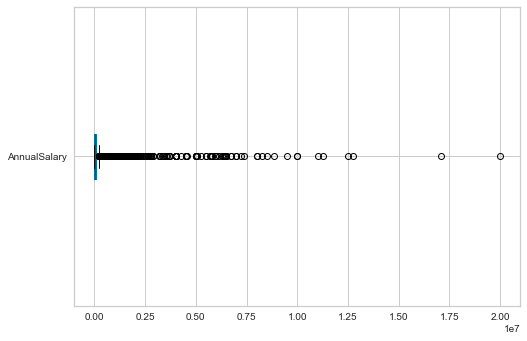

In [230]:
outlier_columns = ["AnnualSalary"]
#for column in outlier_columns:
    #mean = df[column].mean()
    #stdv = df[column].std()
    #min_border = mean - stdv * 2
    #max_border = mean + stdv * 2
    #outliers = df[(df[column] < min_border) | (df[column] > max_border)].index 
    #print(f"{len(outliers)} outliers detected in column {column}")
    #df.loc[outliers,'price']=df['price'].median()
    #df['AnnualSalary'].plot(kind='box' , vert=False)
    #df.drop(outliers , inplace = True)

for column in outlier_columns:
    lower_quartile = df[column].quantile(0.25)
    upper_quartile = df[column].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 1.5
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    
    outliers = df[(df[column]< min_border) | (df[column] > max_border)].index
    df['AnnualSalary'].plot(kind='box' , vert=False)
    print(f"{len(outliers)} outliers detected in column {column}")
    df.drop(outliers,inplace = True)
   #df[(df[column]<min_border) | (df[column] > max_border)] = 
    
    
    
    




In [231]:
#df[df['AnnualSalary'] > 500000].head(3)

In [232]:
df.drop(columns=['ConvertedCompYearly'],axis=1,inplace =True)
#df.loc[df['AnnualSalary'] <= 7255,'AnnualSalary'] = df['AnnualSalary'].median()
df.drop(columns=['YearsCodePro'],inplace = True,axis =1)

In [233]:
df.head(4)

,MainBranch,Employment,Country,EdLevel,DevType,OrgSize,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSys,Age,Ethnicity,GenderEditted,AnnualSalary,CareerLevel
16,I am a developer by profession,Employed full-time,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fullstack Developer,100 to 499 employees,C#;HTML/CSS;Java;JavaScript;Node.js,Microsoft SQL Server;MongoDB;PostgreSQL,AWS;Google Cloud Platform,Angular;ASP.NET Core ;Spring,.NET Core / .NET 5;Flutter,Git;Kubernetes,Android Studio;IntelliJ;Rider;Visual Studio;Vi...,Windows,25-34 years old,Middle Eastern,Male,1206.86,Junior
45,I am a developer by profession,Employed full-time,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Desktop Application Developer,2 to 9 employees,C#;C++;JavaScript;PowerShell;SQL;TypeScript,Microsoft SQL Server;PostgreSQL;Redis,Heroku;Microsoft Azure,ASP.NET Core ;React.js,.NET Core / .NET 5,Docker;Git;Kubernetes,Notepad++;Visual Studio;Visual Studio Code,Windows,35-44 years old,White,Male,12700.80,Chief Architect
50,I am a developer by profession,Employed full-time,Greece,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fullstack Developer,20 to 99 employees,C#;HTML/CSS;JavaScript;Node.js;PowerShell;Type...,Couchbase;MariaDB;Microsoft SQL Server;MongoDB...,AWS;DigitalOcean;Microsoft Azure,Angular;ASP.NET;ASP.NET Core ;Express;Svelte,.NET Framework;.NET Core / .NET 5,Docker;Kubernetes,Notepad++;Visual Studio;Visual Studio Code,Windows,25-34 years old,White,Male,27760.08,Senior
58,"I am not primarily a developer, but I write co...",Employed full-time,Russian Federation,"Professional degree (JD, MD, etc.)",Scientist,20 to 99 employees,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,Oracle,Heroku,Django;FastAPI;Vue.js,NumPy;Pandas;Torch/PyTorch,Docker;Git,IPython/Jupyter;Visual Studio Code,Linux-based,25-34 years old,White,Male,294.37,Mid


### Creating Contenents Feature

In [234]:
df['Continent'] = df['Country'].apply(CreateContinent)

In [235]:
df['Employment']=df['Employment'].map({'Independent contractor, freelancer, or self-employed':'Free Lance',
                                       'Employed full-time':'Full Time',
                                       'Employed part-time':'Part Time'})

In [236]:
df.head(3)

,MainBranch,Employment,Country,EdLevel,DevType,OrgSize,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSys,Age,Ethnicity,GenderEditted,AnnualSalary,CareerLevel,Continent
16,I am a developer by profession,Full Time,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fullstack Developer,100 to 499 employees,C#;HTML/CSS;Java;JavaScript;Node.js,Microsoft SQL Server;MongoDB;PostgreSQL,AWS;Google Cloud Platform,Angular;ASP.NET Core ;Spring,.NET Core / .NET 5;Flutter,Git;Kubernetes,Android Studio;IntelliJ;Rider;Visual Studio;Vi...,Windows,25-34 years old,Middle Eastern,Male,1206.86,Junior,Asia
45,I am a developer by profession,Full Time,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Desktop Application Developer,2 to 9 employees,C#;C++;JavaScript;PowerShell;SQL;TypeScript,Microsoft SQL Server;PostgreSQL;Redis,Heroku;Microsoft Azure,ASP.NET Core ;React.js,.NET Core / .NET 5,Docker;Git;Kubernetes,Notepad++;Visual Studio;Visual Studio Code,Windows,35-44 years old,White,Male,12700.80,Chief Architect,South America
50,I am a developer by profession,Full Time,Greece,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fullstack Developer,20 to 99 employees,C#;HTML/CSS;JavaScript;Node.js;PowerShell;Type...,Couchbase;MariaDB;Microsoft SQL Server;MongoDB...,AWS;DigitalOcean;Microsoft Azure,Angular;ASP.NET;ASP.NET Core ;Express;Svelte,.NET Framework;.NET Core / .NET 5,Docker;Kubernetes,Notepad++;Visual Studio;Visual Studio Code,Windows,25-34 years old,White,Male,27760.08,Senior,Europe


### Types of Employment 

<AxesSubplot:>

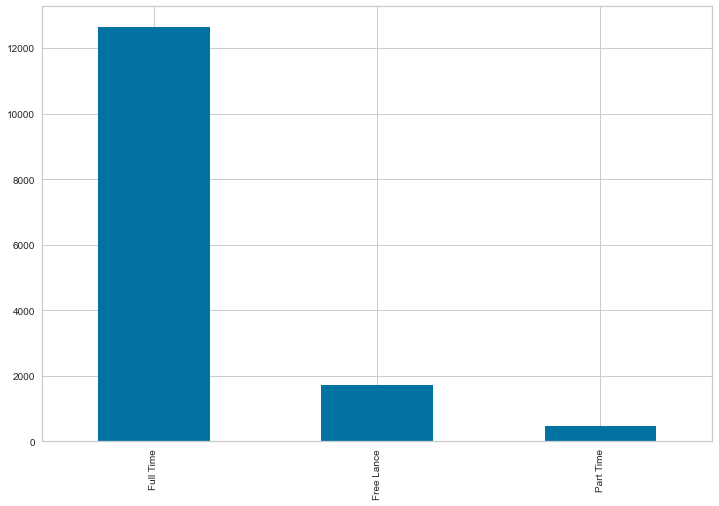

In [237]:
df['Employment'].value_counts().plot(kind = 'bar', figsize =(12,8))

## The Bar plot for plotly doesnt appear and takes some time to show so i used matplotlib instead


#fig = px.bar(df, x='Employment')
#fig.show()

### Top 10 Countries with high Average Annual Salaries

In [238]:
df1 = df.groupby('Country').mean()['AnnualSalary'].sort_values(ascending = False)[:10]#.plot(kind = 'bar', figsize =(12,8))
#plt.grid(False)
df1 = df1.reset_index()
fig = px.bar(df1, x='Country',y='AnnualSalary')
fig.show()

### Programming Languages  used with  highest average paying jobs

In [239]:
df1=df.copy()
df1['LanguageHaveWorkedWith'] = df1['LanguageHaveWorkedWith'].astype(str).apply(lambda x:x.split(';'))
df1 = df1.explode('LanguageHaveWorkedWith')
df1 = df1[['LanguageHaveWorkedWith','AnnualSalary']].groupby('LanguageHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).reset_index()#.plot(
#kind = 'bar' , x = 'LanguageHaveWorkedWith' , y = 'AnnualSalary' , figsize= (12,8))

fig = px.bar(df1, x='LanguageHaveWorkedWith',y='AnnualSalary')
fig.show()

### Average Salaries within each Continent

In [240]:
df1 = df.groupby('Continent').mean()['AnnualSalary'].sort_values(ascending = False).reset_index()#.plot(kind = 'bar' )
#plt.grid(False)
fig = px.bar(df1, x='Continent',y='AnnualSalary')
fig.show()

### Number of software developers in each Continent.

In [241]:
df1 = df.groupby(['Continent']).count()['Country'].sort_values(ascending =False).reset_index()#.plot(kind= 'bar')
df1
fig = px.bar(df1, x='Continent',y='Country')
fig.show()

### Highest paying job titles

In [242]:
df1=df.copy()
df1['DevType'] = df1['DevType'].astype(str).apply(lambda x:x.split(';')[0])
df1 = df1.explode('DevType')
df1 = df1[['DevType','AnnualSalary']].groupby('DevType').mean()['AnnualSalary'].sort_values(ascending = False).reset_index()#.plot(
 #kind = 'bar' , x = 'DevType' , y = 'AnnualSalary' , figsize =(12,8))
fig = px.bar(df1, x='DevType',y='AnnualSalary')
fig.show()

### Highest 10 Individual Salaries in The Data Set 

In [243]:
df1 = df.nlargest(10,"AnnualSalary").reset_index()#.plot(kind='bar' , x = 'Country' ,figsize=(12,8))
df1
fig = px.bar(df1, x='Country',y='AnnualSalary')
fig.show()

### Highest educational levels paid

In [244]:
df1= df.groupby('EdLevel').mean()['AnnualSalary'].sort_values(ascending = False).reset_index()#.plot(kind = 'bar')
fig = px.bar(df1, x='EdLevel',y='AnnualSalary')
fig.show()

### Top used cloud platforms with highest average salaries

In [245]:
df1=df.copy()
df1['PlatformHaveWorkedWith'] = df1['PlatformHaveWorkedWith'].astype(str).apply(lambda x:x.split(';'))
df1 = df1.explode('PlatformHaveWorkedWith')
order = df1[['PlatformHaveWorkedWith','AnnualSalary']].groupby('PlatformHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).index
#plt.figure(figsize=(12,8))
df1 = df1[['PlatformHaveWorkedWith','AnnualSalary','GenderEditted','CareerLevel']].groupby('PlatformHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).reset_index()#.plot(kind = 'bar' , x ='PlatformHaveWorkedWith' , y= 'AnnualSalary' , figsize = (12,8))
fig = px.bar(df1, x='PlatformHaveWorkedWith',y='AnnualSalary')
fig.show()

### Most Platform used by juniors , seniors , managers

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'AWS'),
  Text(1, 0, 'Google Cloud Platform'),
  Text(2, 0, 'Heroku'),
  Text(3, 0, 'Microsoft Azure'),
  Text(4, 0, 'DigitalOcean'),
  Text(5, 0, 'IBM Cloud or Watson'),
  Text(6, 0, 'Oracle Cloud Infrastructure')])

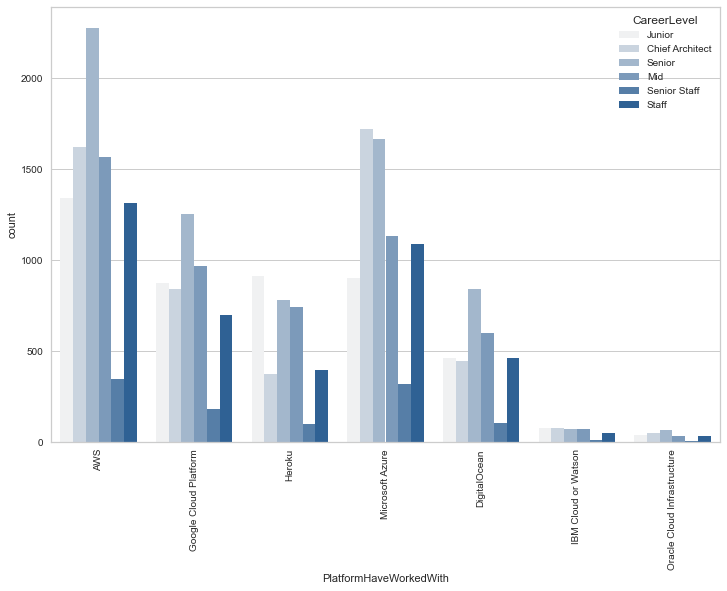

In [246]:
df1=df.copy()
df1['PlatformHaveWorkedWith'] = df1['PlatformHaveWorkedWith'].astype(str).apply(lambda x:x.split(';'))
df1 = df1.explode('PlatformHaveWorkedWith')
order = df1[['PlatformHaveWorkedWith','AnnualSalary']].groupby('PlatformHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).index
color = sns.color_palette("RdBu", 10)[-1]
plt.figure(figsize=(12,8))
sns.countplot(data = df1 , x='PlatformHaveWorkedWith'  , hue = 'CareerLevel' ,color = color )
plt.xticks(rotation = 90)

### Number of male and female developers

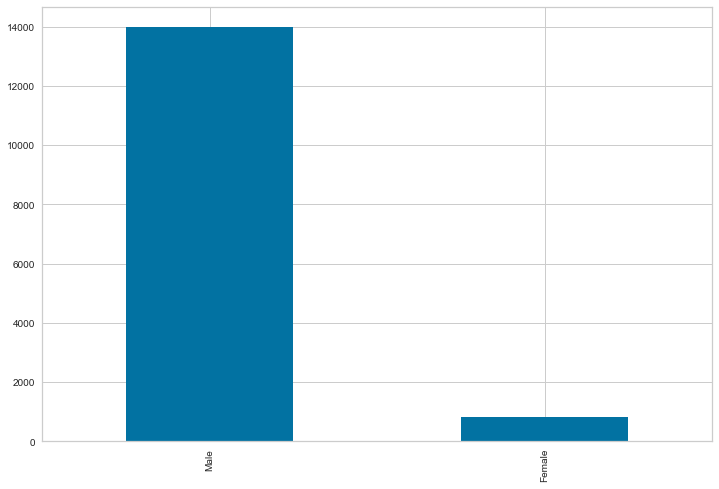

In [247]:
fig, ax = plt.subplots(figsize =(12,8))
df['GenderEditted'].value_counts().plot(kind = 'bar',figsize = (12,8))
#change_width(ax, .35)
plt.show()

## Average annual Salary comparison between Male and Female Developers

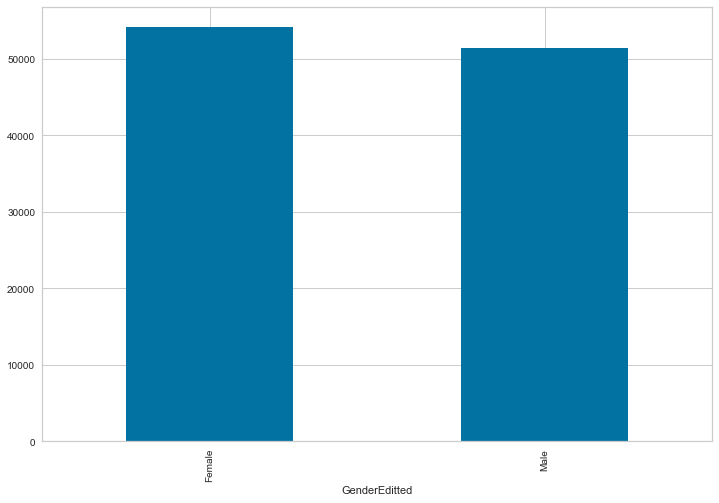

In [250]:
 fig, ax = plt.subplots(figsize =(12,8))
 df.groupby('GenderEditted').mean()['AnnualSalary'].plot(kind = 'bar')
 #change_width(ax, .35)
 plt.show()

### Comparison between Ethnicity mean annual salary.

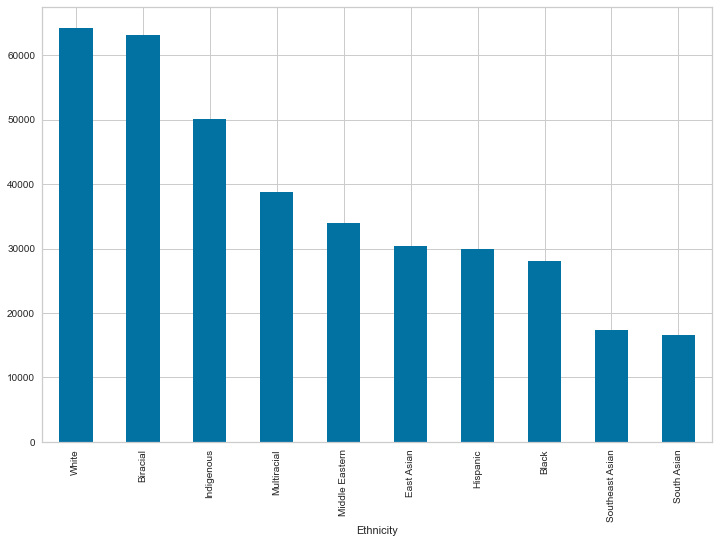

In [252]:
 fig, ax = plt.subplots(figsize =(12,8))
 df.groupby('Ethnicity').mean()['AnnualSalary'].sort_values(ascending =False).plot(kind = 'bar')
 #change_width(ax, .35)
 plt.show()

In [114]:
df.head(3)
df.drop(columns = ['LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith','WebframeHaveWorkedWith',
                   'MiscTechHaveWorkedWith','ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSys','Continent','Age'],axis =1,inplace =True)
df

,MainBranch,Employment,Country,EdLevel,DevType,OrgSize,Ethnicity,GenderEditted,AnnualSalary,CareerLevel
16,I am a developer by profession,Full Time,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fullstack Developer,100 to 499 employees,Middle Eastern,Male,1206.86,Junior
45,I am a developer by profession,Full Time,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Desktop Application Developer,2 to 9 employees,White,Male,12700.80,Chief Architect
50,I am a developer by profession,Full Time,Greece,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fullstack Developer,20 to 99 employees,White,Male,27760.08,Senior
58,"I am not primarily a developer, but I write co...",Full Time,Russian Federation,"Professional degree (JD, MD, etc.)",Scientist,20 to 99 employees,White,Male,294.37,Mid
76,"I am not primarily a developer, but I write co...",Full Time,Poland,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Front-end Developer,"5,000 to 9,999 employees",White,Male,10479.72,Senior
...,...,...,...,...,...,...,...,...,...,...
83425,I am a developer by profession,Full Time,Finland,"Secondary school (e.g. American high school, G...",Fullstack Developer,10 to 19 employees,White,Male,20813.64,Mid
83428,I am a developer by profession,Full Time,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Senior Executive,20 to 99 employees,Hispanic,Male,8658.72,Senior
83431,I am a developer by profession,Free Lance,Pakistan,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Scientist,2 to 9 employees,Southeast Asian,Male,61.88,Mid
83432,I am a developer by profession,Full Time,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Back-end Developer,"10,000 or more employees",East Asian,Female,62531.82,Junior


In [115]:
df['OrgSize'].value_counts()

20 to 99 employees                                    3470
100 to 499 employees                                  2715
2 to 9 employees                                      1728
10,000 or more employees                              1683
1,000 to 4,999 employees                              1525
10 to 19 employees                                    1465
500 to 999 employees                                   911
Just me - I am a freelancer, sole proprietor, etc.     814
5,000 to 9,999 employees                               504
Name: OrgSize, dtype: int64

In [116]:
df.loc[df['OrgSize'] == '20 to 99 employees','OrgSize'] = '20'
df.loc[df['OrgSize'] == '100 to 499 employees','OrgSize'] = '100'
df.loc[df['OrgSize'] == '2 to 9 employees','OrgSize'] = '9'
df.loc[df['OrgSize'] == '10,000 or more employees','OrgSize'] = '10000'
df.loc[df['OrgSize'] == '1,000 to 4,999 employees','OrgSize'] = '1000'
df.loc[df['OrgSize'] == '10 to 19 employees','OrgSize'] = '19'
df.loc[df['OrgSize'] == '500 to 999 employees','OrgSize'] = '500'
df.loc[df['OrgSize'] == 'Just me - I am a freelancer, sole proprietor, etc.','OrgSize'] = '1'
df.loc[df['OrgSize'] == '5,000 to 9,999 employees','OrgSize'] = '5000'

In [117]:
df.loc[df['EdLevel'] == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)','EdLevel'] = 'Bachelors'
df.loc[df['EdLevel'] == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)','EdLevel'] = 'Masters'
df.loc[df['EdLevel'] == 'Some college/university study without earning a degree','EdLevel'] = 'Institute'
df.loc[df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)','EdLevel'] = 'High School'
df.loc[df['EdLevel'] == 'Associate degree (A.A., A.S., etc.)','EdLevel'] = 'Associate'
df.loc[df['EdLevel'] == 'Other doctoral degree (Ph.D., Ed.D., etc.)','EdLevel'] = 'PHD'
df.loc[df['EdLevel'] == 'Something else','EdLevel'] = 'Other'
df.loc[df['EdLevel'] == 'Primary/elementary school','EdLevel'] = 'Elementary'
df.loc[df['EdLevel'] == 'Professional degree (JD, MD, etc.)','EdLevel'] = 'JD'

In [118]:
df.loc[df['MainBranch'] == 'I am a developer by profession','MainBranch']='Developer'
df.loc[df['MainBranch'] == 'I am not primarily a developer, but I write code sometimes as part of my work','MainBranch']='Not Professional Developer'

In [119]:
df.drop(df.loc[df['DevType']=='Other (please specify):'].index,axis =0 ,inplace=True) 

In [120]:
dfPipeLine = df.copy()

In [121]:
dfPipeLine

,MainBranch,Employment,Country,EdLevel,DevType,OrgSize,Ethnicity,GenderEditted,AnnualSalary,CareerLevel
16,Developer,Full Time,Turkey,Bachelors,Fullstack Developer,100,Middle Eastern,Male,1206.86,Junior
45,Developer,Full Time,Brazil,Bachelors,Desktop Application Developer,9,White,Male,12700.80,Chief Architect
50,Developer,Full Time,Greece,Bachelors,Fullstack Developer,20,White,Male,27760.08,Senior
58,Not Professional Developer,Full Time,Russian Federation,JD,Scientist,20,White,Male,294.37,Mid
76,Not Professional Developer,Full Time,Poland,Bachelors,Front-end Developer,5000,White,Male,10479.72,Senior
...,...,...,...,...,...,...,...,...,...,...
83425,Developer,Full Time,Finland,High School,Fullstack Developer,19,White,Male,20813.64,Mid
83428,Developer,Full Time,Brazil,Masters,Senior Executive,20,Hispanic,Male,8658.72,Senior
83431,Developer,Free Lance,Pakistan,Bachelors,Scientist,9,Southeast Asian,Male,61.88,Mid
83432,Developer,Full Time,Canada,Bachelors,Back-end Developer,10000,East Asian,Female,62531.82,Junior


In [122]:
## One Hot Encoding
cat_vars = ['MainBranch','Employment','DevType','OrgSize','GenderEditted','Ethnicity','EdLevel','CareerLevel']#
encoder = OneHotEncoder(sparse =False)
encoder_vars_array = encoder.fit_transform(df[cat_vars])
encoder_feature_names = encoder.get_feature_names(cat_vars)
encoder_vars_df = pd.DataFrame(encoder_vars_array,columns = encoder_feature_names)
df = pd.concat([df.reset_index(drop =True),encoder_vars_df.reset_index(drop =True)],axis =1)


##Binary Encoding 

be = BinaryEncoder()
newdata = be.fit_transform(df[['Country']])
df = pd.concat([df.reset_index(drop=True),newdata.reset_index(drop=True)],axis =1)
df.drop(columns = ['Country','MainBranch','Employment','DevType','OrgSize','GenderEditted','Ethnicity','EdLevel','CareerLevel'],axis =1,inplace =True)

In [123]:
#df.drop(df[df['AnnualSalary'] < 500].index,inplace=True,axis=0)

In [124]:
len(df.columns)

71

In [125]:
df

,AnnualSalary,MainBranch_Developer,MainBranch_Not Professional Developer,Employment_Free Lance,Employment_Full Time,Employment_Part Time,DevType_Academic Researcher,DevType_Back-end Developer,DevType_Data Analyst,DevType_Data Engineer,DevType_Database Administrator,DevType_Designer,DevType_Desktop Application Developer,DevType_DevOps Engineer,DevType_Educator,DevType_Embedded Systems Developer,DevType_Engineering Manager,DevType_Front-end Developer,DevType_Fullstack Developer,DevType_Game Developer,DevType_Marketing,DevType_Mobile Developer,DevType_QA Engineer,DevType_Scientist,DevType_Senior Executive,DevType_Site Reliability Engineer,DevType_System Administrator,OrgSize_1,OrgSize_100,OrgSize_1000,OrgSize_10000,OrgSize_19,OrgSize_20,OrgSize_500,OrgSize_5000,OrgSize_9,GenderEditted_Female,GenderEditted_Male,Ethnicity_Biracial,Ethnicity_Black,Ethnicity_East Asian,Ethnicity_Hispanic,Ethnicity_Indigenous,Ethnicity_Middle Eastern,Ethnicity_Multiracial,Ethnicity_South Asian,Ethnicity_Southeast Asian,Ethnicity_White,EdLevel_Associate,EdLevel_Bachelors,EdLevel_Elementary,EdLevel_High School,EdLevel_Institute,EdLevel_JD,EdLevel_Masters,EdLevel_Other,EdLevel_PHD,CareerLevel_Chief Architect,CareerLevel_Junior,CareerLevel_Mid,CareerLevel_Senior,CareerLevel_Senior Staff,CareerLevel_Staff,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7
0,1206.86,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,1
1,12700.80,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0
2,27760.08,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0,0,0,0,0,0,1,1
3,294.37,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0,0,0,0,0,1,0,0
4,10479.72,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14810,20813.64,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0,0,1,0,1,0,0,0
14811,8658.72,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.0

In [126]:
# pca = PCA(n_components = None , random_state= 42)
# pca.fit(df)
# explained_variance = pca.explained_variance_ratio_
# explained_variance_cumulative = pca.explained_variance_ratio_.cumsum()
# num_vars_list = list(range(1,72))
# plt.figure(figsize=(15,10))
# plt.subplot(2,1,1)
# plt.bar(num_vars_list,explained_variance)
# plt.title("Variance across Principal Components")
# plt.xlabel('Number of Components')
# plt.ylabel('% variance')
# plt.tight_layout()

# plt.subplot(2,1,2)
# plt.plot(num_vars_list,explained_variance_cumulative)
# plt.title("Variance across Principal Components")
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative % variance')
# plt.tight_layout()

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df.drop(columns = ['AnnualSalary'],axis=1)
y= df['AnnualSalary']
X_train , X_test , y_train , y_test = train_test_split(X, y,test_size = 0.2, random_state =42)

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

regressor = RandomForestRegressor(n_estimators =25,random_state=42,n_jobs =-1,min_samples_leaf=6,oob_score = True)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
r2_score(y_test,y_pred)

0.7339236199468817

In [128]:
r_squared = r2_score(y_test,y_pred)
num_data_points, num_input_vars = X_test.shape
adjusted_r2 = 1-(1 - r_squared) * (num_data_points - 1) / (num_data_points - num_input_vars)
print(adjusted_r2)

0.7275775189362819


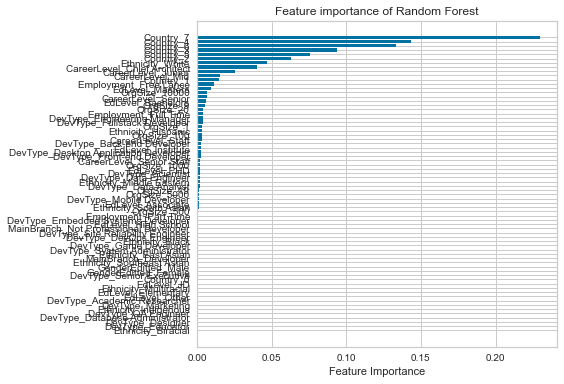

In [129]:
regressor.feature_importances_
feature_importance = pd.DataFrame(regressor.feature_importances_)
feature_names = pd.DataFrame(X.columns)
feature_importance_summary = pd.concat([feature_names,feature_importance],axis =1)
feature_importance_summary.columns = ["input_variable" ,"feature_importance"]
feature_importance_summary.sort_values(by="feature_importance",inplace =True)
plt.barh(feature_importance_summary["input_variable"],feature_importance_summary["feature_importance"])
plt.title("Feature importance of Random Forest")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

In [130]:
# pca = PCA(n_components = 0.80 , random_state= 42)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)


In [131]:
# pca.n_components_

In [132]:
regressor = RandomForestRegressor(n_estimators = 25,random_state=42,n_jobs =-1)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
r2_score(y_test,y_pred)

0.7101002282086193

In [133]:
setup(data = df, # Dataframe for training/validation split
      session_id = 4588,
      target = 'AnnualSalary', # Defining target variable 
      normalize = True, # Normalizing data
      #outliers_threshold=0.5,
      #remove_outliers = True, # Removing outliers
      fold = 5,
      
      #numeric_features=['YearsCodePro'],
      transform_target = True, # Transforming target variable to a normal/gaussian distribution 
      transformation = True # Transforming distribution of all other features
      # Ordinal edncoding
      #high_cardinality_features = ['Country','MainBranch','Employment','DevType','OrgSize','GenderEditted']
     ) # Encoding of high cardinality features

,Description,Value
0,session_id,4588
1,Target,AnnualSalary
2,Original Data,"(14815, 71)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,70
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10370, 67)"


('AnnualSalary',
 True,
 'lightgbm',
 -1,
 1969     80000.00
 10776   142421.41
 33       70000.00
 7910        51.58
 13125    90000.00
            ...   
 8558    170000.00
 11075     1081.08
 10089        1.23
 3643     62453.76
 4761    120000.00
 Name: AnnualSalary, Length: 10370, dtype: float32,
 -1,
 None,
 {'USI',
  'X',
  'X_test',
  'X_train',
  '_all_metrics',
  '_all_models',
  '_all_models_internal',
  '_available_plots',
  '_gpu_n_jobs_param',
  '_internal_pipeline',
  '_ml_usecase',
  'create_model_container',
  'dashboard_logger',
  'data_before_preprocess',
  'display_container',
  'exp_name_log',
  'experiment__',
  'fix_imbalance_method_param',
  'fix_imbalance_param',
  'fold_generator',
  'fold_groups_param',
  'fold_groups_param_full',
  'fold_param',
  'fold_shuffle_param',
  'gpu_param',
  'html_param',
  'imputation_classifier',
  'imputation_regressor',
  'iterative_imputation_iters_param',
  'log_plots_param',
  'logging_param',
  'master_model_container',
  

In [ ]:
dfPipeLine

### Creating the PipeLine 

In [1004]:

categorical_vars = ['MainBranch','Employment','DevType','OrgSize','GenderEditted','Ethnicity','EdLevel','CareerLevel']
categorical_vars2 = ['Country']

X = dfPipeLine.drop(columns = ['AnnualSalary'],axis=1)
y= dfPipeLine['AnnualSalary']
X_train , X_test , y_train , y_test = train_test_split(X, y,test_size = 0.2, random_state =42)


#pca = PCA(n_components = 0.75 , random_state= 42)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)



In [1005]:
categorical_transformer = Pipeline(steps = [('ohe',OneHotEncoder(handle_unknown ='ignore'))])

In [1006]:
categorical_transformer2 = Pipeline(steps = [('bi',BinaryEncoder())])

In [1007]:
preprocessing_pipeline = ColumnTransformer(transformers = [("categorical",categorical_transformer,categorical_vars),
                                                          ("categorical2",categorical_transformer2,categorical_vars2)])

In [1008]:
reg = Pipeline(steps = [("preprocessing_pipeline",preprocessing_pipeline),
                       ("regressor",RandomForestRegressor(n_estimators =25,random_state=42,n_jobs =-1,min_samples_leaf=6,oob_score = True))])

In [1009]:
reg.fit(X_train,y_train)

Pipeline(steps=[('preprocessing_pipeline',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MainBranch', 'Employment',
                                                   'DevType', 'OrgSize',
                                                   'GenderEditted', 'Ethnicity',
                                                   'EdLevel', 'CareerLevel']),
                                                 ('categorical2',
                                                  Pipeline(steps=[('bi',
                                                                   BinaryEncoder())]),
                                                  ['Country'])])),
                ('regressor',
                 RandomForestRegressor(min_samples_leaf=6, n_estimators=2

In [1026]:
dfPipeLine.columns

Index(['MainBranch', 'Employment', 'Country', 'EdLevel', 'DevType', 'OrgSize',
       'Ethnicity', 'GenderEditted', 'AnnualSalary', 'CareerLevel'],
      dtype='object')

In [1010]:
y_pred_reg = reg.predict(X_test)
r2_score(y_test,y_pred_reg)

0.7436223208810195

In [1011]:
import joblib
joblib.dump(reg,'reg2.joblib')


['reg2.joblib']

In [1012]:
reg = joblib.load('reg2.joblib')

In [1013]:
new_data = pd.DataFrame({'MainBranch':['Developer'],
                        'Employment':['Full Time'],
                        'Country':['Germany'],
                        'EdLevel':['Bachelor'],
                        'DevType':['Data Analyst'],
                        'OrgSize':['100'],
                        'Ethnicity':['White'],
                        'GenderEditted':['Male'],
                        'CareerLevel':['Junior']})

result = reg.predict(new_data)

In [1027]:
result[0]

42715.139029014455

In [1015]:
df

,AnnualSalary,MainBranch_Developer,MainBranch_Not Professional Developer,Employment_Free Lance,Employment_Full Time,Employment_Part Time,DevType_Academic Researcher,DevType_Back-end Developer,DevType_Data Analyst,DevType_Data Engineer,DevType_Database Administrator,DevType_Designer,DevType_Desktop Application Developer,DevType_DevOps Engineer,DevType_Educator,DevType_Embedded Systems Developer,DevType_Engineering Manager,DevType_Front-end Developer,DevType_Fullstack Developer,DevType_Game Developer,DevType_Marketing,DevType_Mobile Developer,DevType_QA Engineer,DevType_Scientist,DevType_Senior Executive,DevType_Site Reliability Engineer,DevType_System Administrator,OrgSize_1,OrgSize_100,OrgSize_1000,OrgSize_10000,OrgSize_19,OrgSize_20,OrgSize_500,OrgSize_5000,OrgSize_9,GenderEditted_Female,GenderEditted_Male,Ethnicity_Biracial,Ethnicity_Black,Ethnicity_East Asian,Ethnicity_Hispanic,Ethnicity_Indigenous,Ethnicity_Middle Eastern,Ethnicity_Multiracial,Ethnicity_South Asian,Ethnicity_Southeast Asian,Ethnicity_White,EdLevel_Associate,EdLevel_Bachelors,EdLevel_Elementary,EdLevel_High School,EdLevel_Institute,EdLevel_JD,EdLevel_Masters,EdLevel_Other,EdLevel_PHD,CareerLevel_Chief Architect,CareerLevel_Junior,CareerLevel_Mid,CareerLevel_Senior,CareerLevel_Senior Staff,CareerLevel_Staff,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7
0,1206.86,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,1
1,12700.80,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0
2,27760.08,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0,0,0,0,0,0,1,1
3,294.37,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0,0,0,0,0,1,0,0
4,10479.72,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14810,20813.64,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0,0,1,0,1,0,0,0
14811,8658.72,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.0

In [1520]:
df['DevType'].value_counts()

Fullstack Developer              2512
Front-end Developer              1861
Desktop Application Developer    1778
Mobile Developer                 1617
Back-end Developer               1545
Scientist                        1173
Data Engineer                     761
Embedded Systems Developer        682
Game Developer                    645
Data Analyst                      628
DevOps Engineer                   437
Engineering Manager               355
System Administrator              269
Site Reliability Engineer         249
QA Engineer                       104
Academic Researcher                97
Senior Executive                   70
Educator                           13
Designer                            8
Marketing                           7
Database Administrator              4
Name: DevType, dtype: int64

In [134]:
top_3 = compare_models(n_select = 3, sort = 'R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,18043.5904,951079860.4773,30817.8829,0.6875,1.4777,76.7080,0.3420
rf,Random Forest Regressor,18397.2777,993530727.6151,31507.2350,0.6732,1.4529,80.3437,1.1220
et,Extra Trees Regressor,22396.6057,1390775331.5070,37272.8236,0.5425,1.7546,183.6828,1.5580
knn,K Neighbors Regressor,24696.5744,1415307266.5803,37610.1823,0.5347,1.9347,317.6330,1.3220
gbr,Gradient Boosting Regressor,24249.4891,1415739580.1500,37609.5962,0.5346,1.9349,174.5919,0.4160
dt,Decision Tree Regressor,22994.8270,1481048767.6751,38464.9692,0.5128,1.8251,223.0942,0.6080
ridge,Ridge Regression,26815.8449,1632297088.0000,40369.5359,0.4636,2.1321,339.7716,0.6260
br,Bayesian Ridge,26822.6384,1633221355.1182,40381.2685,0.4633,2.1337,337.5137,0.0860
lar,Least Angle Regression,26836.1884,1638672554.6947,40447.8016,0.4615,2.1322,340.2965,0.0560
omp,Orthogonal Matching Pursuit,29330.8621,1927042579.7246,43874.2978,0.3667,2.2395,258.6278,0.0460


In [ ]:
top3 = compare_models(n_select=3,sort = 'MSE')

In [ ]:
cat_vars =['Country','MainBranch','DevType','OrgSize','GenderEditted','Ethnicity']

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from category_encoders import BinaryEncoder
# #be = BinaryEncoder()
# #newdata = be.fit_transform(dfFinal[['Country','MainBranch','DevType','OrgSize','GenderEditted','Ethnicity']])
# #dfFinal = pd.concat([dfFinal,newdata],axis =1)

In [ ]:
#dfFinal.drop(columns = ['Country','MainBranch','DevType','OrgSize','GenderEditted','Ethnicity'],axis =1,inplace =True)
#dfFinal

In [ ]:
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse =False,drop='first')
# encoder_vars_array = encoder.fit_transform(dfFinal[cat_vars])
# encoder_feature_names = encoder.get_feature_names(cat_vars)
# encoder_vars_df = pd.DataFrame(encoder_vars_array,columns = encoder_feature_names)
# dfFinal = pd.concat([dfFinal.reset_index(drop =True),encoder_vars_df.reset_index(drop =True)],axis =1)
# imputer = KNNImputer(n_neighbors=10,metric='nan_euclidean')
# imputer.fit(dfFinal)
# #dfFinal = pd.DataFrame(imputer.transform(dfFinal))
# dfFinal.drop(columns = cat_vars,axis =1,inplace =True)

In [ ]:
# dfFinal

In [ ]:
#  sns.regplot(x=dfFinal[0], y=dfFinal[1], data=dfFinal)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# X = dfFinal.drop(columns = [1],axis=1)
# y= dfFinal[1]
# X_train , X_test , y_train , y_test = train_test_split(X, y,test_size = 0.2, random_state =42)

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# regressor = RandomForestRegressor(n_estimators = 20,random_state=42,n_jobs =-1)
# regressor.fit(X_train,y_train)

# y_pred = regressor.predict(X_test)

# #r2_score(y_test,y_pred)
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

# #print(confusion_matrix(y_test,y_pred))
# #print(classification_report(y_test,y_pred))
# #print(accuracy_score(y_test, y_pred))

In [ ]:
dfFinal

### Getting rows with Zero Annual Salaries to fill with the mean salary for each country.

### But be aware of the MainBranch  Column Data as we cannot fill the AnnualSalary for Students and 
 
### Unemployed people taking the survey  So we DROP them.

In [ ]:
#df.shape

In [ ]:
#df['DevType'].isna().sum()

In [ ]:
#df.isna().sum()

In [ ]:
#df.dropna(subset=['DevType','Employment'],inplace=True)

In [ ]:
#df[df['Employment'].isna()==True][['ConvertedCompYearly','Country','DevType','LanguageHaveWorkedWith']].isna().sum()

In [ ]:
#df['Employment']=df['Employment'].map({'Independent contractor, freelancer, or self-employed':'Free Lance',
                                      # 'Employed full-time':'Full Time',
                                      # 'Employed part-time':'Part Time'})
#df['Employment'].fillna(value = df['Employment'].mode()[0],inplace = True)

In [ ]:
#df['Employment'].value_counts().plot(kind = 'bar', figsize =(12,8))

In [ ]:
#df['AnnualSalary'].isna().sum()

In [ ]:
#df.isna().sum()

In [ ]:
#df.info()

In [ ]:
#df.drop(columns=['PlatformHaveWorkedWith','WebframeHaveWorkedWith','MiscTechHaveWorkedWith','ToolsTechHaveWorkedWith','ConvertedCompYearly'
               # ,'SOVisitFreq','NEWStuck','OpSys','NEWCollabToolsHaveWorkedWith','YearsCode','LearnCode','Age','LanguageHaveWorkedWith'],axis =1,inplace =True)

## Dropping an outlier in Afghanistan that was Affecting the mean salary of this country and the overall mean of countries

In [ ]:
#df.drop(df.loc[(df['Country'] == 'Afghanistan')].index[26],axis = 0 , inplace = True)

In [ ]:
# for country in df[df['AnnualSalary'].isna()]['Country'].unique():
#    dfcountry = df.loc[(df['Country'] == country) & (df['AnnualSalary'].isna())]
#    dfcountry['AnnualSalary'].fillna(value = df[df['Country'] == country]['AnnualSalary'].mean(),inplace = True)
#    df.drop(df.loc[(df['Country'] ==country)&(df['AnnualSalary'].isna())].index,axis =0,inplace =True)
#    df =pd.concat([df,dfcountry], axis = 0)

In [ ]:
#df['AnnualSalary'].isna().sum()

In [ ]:
#df.loc[df['AnnualSalary'] < 1000,'AnnualSalary'] = 1000

In [ ]:
# def EmployeeLevel (age):
#     if age in range(17,27):
#         return 'Junior'
#     elif age in range(27,32):
#         return 'Senior'
#     elif age in range(32,40):
#         return 'Lead'
#     else:
#         return 'Manager'

In [ ]:
#df['EmployeeLevel'] = df['Age'].apply(EmployeeLevel)

### Droping the remaining Null values after cleaning

In [ ]:
#df.dropna(how ='any',subset = ['AnnualSalary'],inplace =True)

In [ ]:
#df.isna().sum()

## Droping more columns that will not be used any more

In [ ]:
#df.drop(columns=['Currency','CurrencyConversionRates','Gender','Currency','LearnCode','MainBranch' , 'ConvertedCompYearly'],axis = 1,inplace = True)

In [ ]:
#df['LanguageHaveWorkedWith'].unique()

## Some Analysis For The Data Set :

In [ ]:
#df1=df.copy()
#df1['LanguageHaveWorkedWith'] = df1['LanguageHaveWorkedWith'].astype(str).apply(lambda x:x.split(';'))
#df1 = df1.explode('LanguageHaveWorkedWith')

## Top 10 Highest Countries Annual Salary 

In [ ]:
#df.groupby('Country').mean()['AnnualSalary'].sort_values(ascending = False)[:10].plot(kind = 'bar' , figsize =(12,8))

## Programming Languages with Maximum Annual Salary 

In [ ]:
#df1[['LanguageHaveWorkedWith','AnnualSalary']].groupby('LanguageHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).plot(
#kind = 'bar' , x = 'LanguageHaveWorkedWith' , y = 'AnnualSalary' , figsize= (12,8))
#plt.figure(figsize=(15,8))
#ax = sns.barplot(data = df1 , x = 'LanguageHaveWorkedWith' , y = 'AnnualSalary' , order = order, ci = None)
#x.set_xticklabels(ax.get_xticklabels(),rotation = 90)

## Creating Continents Feature to Compare each Continent's Insights

In [ ]:
# AfricanCountries = ['Egypt','United Republic of Tanzania','South Africa','Tunisia','Morocco', 'Nigeria', 'Kenya', 'Algeria'
#                    ,'Ethiopia','Libyan Arab Jamahiriya','Mauritania','Sudan','Senegal','Zambia','Ghana','Uganda','Zimbabwe'
#                    ,'Democratic Republic of the Congo', 'Togo','Angola','Burundi','Central African Republic','Guinea', "Côte d'Ivoire", 'Cameroon',
#                    'Congo, Republic of the...','Madagascar','Rwanda', 'Malawi','Somalia','Mozambique', 'Botswana', 'Swaziland','Benin'
#                    ,'Uganda','Burkina Faso','Cape Verde','Namibia','Lesotho','Liberia','Mauritius','Gambia','Niger', 'Djibouti']
# EuropeanCountries = ['Slovakia', 'Netherlands','Austria',
#        'United Kingdom of Great Britain and Northern Ireland','Sweden', 'Spain',
#        'Germany','France', 'Switzerland','Poland', 'Ukraine','Portugal', 'Italy', 'Bulgaria', 'Greece','Ireland', 'Georgia',
#                   'Hungary', 'Belgium', 'Albania', 'Romania', 'Sri Lanka', 'Lithuania', 'Slovenia',
#        'Croatia', 'Czech Republic', 'Denmark', 'Armenia','Serbia',
#        'Estonia','Finland', 'Kosovo','Bolivia','Bosnia and Herzegovina','Norway', 'Belarus','Luxembourg', 'Malta',
#                   'The former Yugoslav Republic of Macedonia' , 'Cyprus', 'Nomadic','Latvia', 'Iceland','Republic of Moldova',
#                    'San Marino','Montenegro','Andorra','Monaco','Isle of Man']
# Australia = ['Australia','Fiji','New Zealand']
# NorthAmericanCountries = ['United States of America','Canada','Dominican Republic','Costa Rica','Mexico',
#                           'Saint Vincent and the Grenadines','Jamaica','Belize','Saint Lucia',
#                          'Guatemala','Panama','Cuba','El Salvador','Dominica','Nicaragua','Barbados','Haiti',
#                          'Saint Kitts and Nevis']
# AsianCountries = ['Turkey','China' , 'Singapore' ,'Russian Federation','Uzbekistan','Pakistan',
#                  'Bangladesh','Viet Nam','India','Lebanon','Bahrain','Indonesia','Iran, Islamic Republic of...',
#                 'Hong Kong (S.A.R.)', 'Japan', 'United Arab Emirates','Jordan','Syrian Arab Republic','Taiwan'
#                  ,'South Korea','Nepal','Israel','Kazakhstan','Iraq',
#        'Philippines', 'Azerbaijan', 'Saudi Arabia', 'Honduras','Myanmar',
#        'Republic of Korea', 'Cambodia', 'Kyrgyzstan', 'Afghanistan','Turkmenistan','Qatar','Palestine', 'Mongolia', 'Tajikistan',
#                  'Oman','Maldives','Bhutan', 'North Korea','Malaysia','Thailand','Cambodia','Yemen','Kuwait',"Lao People's Democratic Republic",
#                  'Trinidad and Tobago']
# SouthAmericanCountries = ['Brazil','Colombia','Chile','Argentina', 'Peru','Bolivia','Uruguay','Venezuela, Bolivarian Republic of...',
#                          'Dominican Republic', 'Ecuador','Paraguay','Guyana','Suriname']
# def CreateContinent(country):
#     if country in AfricanCountries:
#         return 'Africa'
#     elif country in EuropeanCountries :
#         return 'Europe'
#     elif country in Australia:
#         return 'Australia'
#     elif country in SouthAmericanCountries :
#         return 'South America'
#     elif country in NorthAmericanCountries :
#         return 'North America'
#     elif country in AsianCountries :
#         return 'Asia'
#     else :
#         return np.nan

In [ ]:
# EuropeanCountries = ['Slovakia', 'Netherlands','Austria',
#        'United Kingdom of Great Britain and Northern Ireland','Sweden', 'Spain',
#        'Germany','France', 'Switzerland','Poland', 'Ukraine','Portugal', 'Italy', 'Bulgaria', 'Greece','Ireland', 'Georgia',
#                   'Hungary', 'Belgium', 'Albania', 'Romania', 'Sri Lanka', 'Lithuania', 'Slovenia',
#        'Croatia', 'Czech Republic', 'Denmark', 'Armenia','Serbia',
#        'Estonia','Finland', 'Kosovo','Bolivia','Bosnia and Herzegovina','Norway', 'Belarus','Luxembourg', 'Malta',
#                   'The former Yugoslav Republic of Macedonia' , 'Cyprus', 'Nomadic','Latvia', 'Iceland','Republic of Moldova',
#                    'San Marino','Montenegro','Andorra','Monaco','Isle of Man']

In [ ]:
# Australia = ['Australia','Fiji','New Zealand']

In [ ]:
# NorthAmericanCountries = ['United States of America','Canada','Dominican Republic','Costa Rica','Mexico',
#                           'Saint Vincent and the Grenadines','Jamaica','Belize','Saint Lucia',
#                          'Guatemala','Panama','Cuba','El Salvador','Dominica','Nicaragua','Barbados','Haiti',
#                          'Saint Kitts and Nevis']

In [ ]:
# AsianCountries = ['Turkey','China' , 'Singapore' ,'Russian Federation','Uzbekistan','Pakistan',
#                  'Bangladesh','Viet Nam','India','Lebanon','Bahrain','Indonesia','Iran, Islamic Republic of...',
#                 'Hong Kong (S.A.R.)', 'Japan', 'United Arab Emirates','Jordan','Syrian Arab Republic','Taiwan'
#                  ,'South Korea','Nepal','Israel','Kazakhstan','Iraq',
#        'Philippines', 'Azerbaijan', 'Saudi Arabia', 'Honduras','Myanmar',
#        'Republic of Korea', 'Cambodia', 'Kyrgyzstan', 'Afghanistan','Turkmenistan','Qatar','Palestine', 'Mongolia', 'Tajikistan',
#                  'Oman','Maldives','Bhutan', 'North Korea','Malaysia','Thailand','Cambodia','Yemen','Kuwait',"Lao People's Democratic Republic",
#                  'Trinidad and Tobago']

In [ ]:
# SouthAmericanCountries = ['Brazil','Colombia','Chile','Argentina', 'Peru','Bolivia','Uruguay','Venezuela, Bolivarian Republic of...',
#                          'Dominican Republic', 'Ecuador','Paraguay','Guyana','Suriname']

In [ ]:
# def CreateContinent(country):
#     if country in AfricanCountries:
#         return 'Africa'
#     elif country in EuropeanCountries :
#         return 'Europe'
#     elif country in Australia:
#         return 'Australia'
#     elif country in SouthAmericanCountries :
#         return 'South America'
#     elif country in NorthAmericanCountries :
#         return 'North America'
#     elif country in AsianCountries :
#         return 'Asia'
#     else :
#         return np.nan

In [ ]:
#df['Continent'] = df['Country'].apply(CreateContinent)

In [ ]:
#df['Continent'].isna().sum()

In [ ]:
#df[df['Continent'] == 'North America']['AnnualSalary'].max()

In [ ]:
#df[df['Continent'] == 'Europe']['AnnualSalary'].max()

## Mean Annual Salary For Each Continent 

In [ ]:
# plt.figure(figsize =(12,8))
# df.groupby('Continent').mean()['AnnualSalary'].sort_values(ascending = False).plot(kind = 'bar' )
# plt.grid(False)

## Number of Developers in Each Continent for the data set

In [ ]:
# plt.figure(figsize =(12,8))
# df.groupby(['Continent']).count()['Country'].sort_values(ascending =False).plot(kind= 'bar')
# plt.grid(False)

## Data Scientists and Full Stack Specilization Features :

In [ ]:
# def IsFullStack(dfr):
#     if 'Developer, full-stack' in dfr:
#         return 1
#     else:
#         return 0
    
# def IsDataScientist(dfr):
#     if 'Data scientist or machine learning specialist' in dfr:
#         return 1
#     else:
#         return 0    

    
# df['IsDataScientist'] = df['DevType'].apply(IsDataScientist)
# df['IsFullStack'] = df['DevType'].apply(IsFullStack)

## Job Titles With High Average Annual Salary

In [ ]:
# df1=df.copy()
# df1['DevType'] = df1['DevType'].astype(str).apply(lambda x:x.split(';')[0])
# df1 = df1.explode('DevType')
# df1[['DevType','AnnualSalary']].groupby('DevType').mean()['AnnualSalary'].sort_values(ascending = False).plot(
#  kind = 'bar' , x = 'DevType' , y = 'AnnualSalary' , figsize =(12,8))
# #plt.figure(figsize=(15,8))
# #ax = sns.barplot(data = df1 , x = 'DevType' , y = 'AnnualSalary' , order = order, ci = None)
# #ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

## Highest 10 Individual Salaries in The Data Set 

In [ ]:
#df[['AnnualSalary','Country']].sort_values(by='AnnualSalary',ascending=False)[:10].plot(kind='bar' , x = 'Country' ,figsize=(12,8))

In [ ]:
# def format_number(data_value,indx):
#     if data_value >1000000:
#         formatter = '{:1.1f}M'.format(data_value*0.000001)
#     else:
#         formatter = '{:1.0f}K'.format(data_value*0.001)
#     return formatter    


In [ ]:
#ax = sns.histplot(data =df , x ='AnnualSalary')
#ax.set_xticks(2000,2000000,100000)
#ax.xaxis.set_major_formatter(format_number)
#plt.tight_layout()

In [ ]:
#ax = sns.histplot(data=df,x= 'AnnualSalary')
#plt.xticks(np.arange(0, len(df['AnnualSalary'])+1, 250000))
#ax.xaxis.set_major_formatter(format_number)
#plt.tight_layout()

##  Education Level with Highest Annual Salary

In [ ]:
# plt.figure(figsize=(12,8))
# df.groupby('EdLevel').mean()['AnnualSalary'].sort_values(ascending = False).plot(kind = 'bar')

## Platforms Used with Highest mean Annual Salary

In [ ]:
# df1=df.copy()
# df1['PlatformHaveWorkedWith'] = df1['PlatformHaveWorkedWith'].astype(str).apply(lambda x:x.split(';'))
# df1 = df1.explode('PlatformHaveWorkedWith')
# order = df1[['PlatformHaveWorkedWith','AnnualSalary']].groupby('PlatformHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).index
# plt.figure(figsize=(12,8))
# #ax = sns.barplot(data = df1 , x = 'PlatformHaveWorkedWith' , y = 'AnnualSalary' , order = order, ci = None ,  color = )
# #ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [ ]:
# df1[['PlatformHaveWorkedWith','AnnualSalary','GenderEditted','EmployeeLevel']].groupby('PlatformHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).plot(kind = 'bar' , x ='PlatformHaveWorkedWith' , y= 'AnnualSalary' , figsize = (12,8))

## Most Platform used by juniors , seniors , managers

In [ ]:
# ### Most junior level developers use AWS so maybe its easier than other platforms
# #color = sns.color_palette()
# color = sns.color_palette("RdBu", 10)[-1]
# plt.figure(figsize=(12,8))
# sns.countplot(data = df1 , x='PlatformHaveWorkedWith'  , hue = 'EmployeeLevel' ,color = color )
# plt.xticks(rotation = 90)

## Number of Full Time Employers Compared to Free Lancers

In [ ]:
# df['Employment'].value_counts().plot(kind = 'bar',figsize = (12,8))

In [ ]:
# def change_width(ax, new_value) :
#     for patch in ax.patches :
#         current_width = patch.get_width()
#         diff = current_width - new_value

#         # we change the bar width
#         patch.set_width(new_value)

#         # we recenter the bar
#         patch.set_x(patch.get_x() + diff * .5)


## Webframe works used with Highest Annual Salaries

In [ ]:
# df1=df.copy()
# df1['WebframeHaveWorkedWith'] = df1['WebframeHaveWorkedWith'].astype(str).apply(lambda x:x.split(';'))
# df1 = df1.explode('WebframeHaveWorkedWith')
# order = df1[['WebframeHaveWorkedWith','AnnualSalary']].groupby('WebframeHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).index
# #plt.figure(figsize=(12,8))
# #ax = sns.barplot(data = df1 , x = 'WebframeHaveWorkedWith' , y = 'AnnualSalary' , order = order, ci = None)
# #ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [ ]:
# df1[['WebframeHaveWorkedWith','AnnualSalary']].groupby('WebframeHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).plot(
# kind = 'bar' , x = 'WebframeHaveWorkedWith' , y = 'AnnualSalary' , figsize = (12,8))

## Management Information Systems used with Highest Annual Salaries

In [ ]:
# df1=df.copy()
# df1['MiscTechHaveWorkedWith'] = df1['MiscTechHaveWorkedWith'].astype(str).apply(lambda x:x.split(';'))
# df1 = df1.explode('MiscTechHaveWorkedWith')
# order = df1[['MiscTechHaveWorkedWith','AnnualSalary']].groupby('MiscTechHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).index
# #plt.figure(figsize=(12,8))
# #ax = sns.barplot(data = df1 , x = 'MiscTechHaveWorkedWith' , y = 'AnnualSalary' , order = order, ci = None)
# #ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [ ]:
# df1[['MiscTechHaveWorkedWith','AnnualSalary']].groupby('MiscTechHaveWorkedWith').mean()['AnnualSalary'].sort_values(ascending = False).plot(
# kind = 'bar' , x= 'MiscTechHaveWorkedWith' , y = 'AnnualSalary' , figsize = (12,8))

## Number of Male and Female Developers 

In [ ]:
# fig, ax = plt.subplots(figsize =(12,8))
# df['GenderEditted'].value_counts().plot(kind = 'bar',figsize = (12,8))


# change_width(ax, .35)
# plt.show()

## Average Developer Ages 

In [ ]:
# df['Age'].mean()

## Comparison Between Average Annual Salary for Data Scientists and Full Stack Developers

In [ ]:
# color = sns.color_palette("RdBu", 10)[-1]
# y = [df.loc[df['IsFullStack'] == 1 , 'AnnualSalary'].mean() , df.loc[df['IsDataScientist'] == 1 , 'AnnualSalary'].mean()]
# x = ['Full Stack','Data Scientist']

# fig, ax = plt.subplots(figsize =(12,8))
# sns.barplot(data = df , x = x , y = y , ci = None , color = color)
# change_width(ax, .35)
# plt.show()

## Number of Data Scientists In Each Continent

In [ ]:
# plt.figure(figsize= (12,8))
# df.groupby('Continent').sum()['IsDataScientist'].sort_values(ascending =False).plot(kind = 'bar')

## Number of Full Stack Developers in Each Continent

In [ ]:
# plt.figure(figsize= (12,8))
# df.groupby('Continent').sum()['IsFullStack'].sort_values(ascending = False).plot(kind = 'bar')

# Insights About Software Developer Jobs In Egypt

In [ ]:
# EgyptData = df[df['Country'] == 'Egypt']

## Software Specializations with highest Annual Salaries

In [ ]:
# df1=EgyptData.copy()
# df1['DevType'] = df1['DevType'].astype(str).apply(lambda x:x.split(';')[0])
# df1 = df1.explode('DevType')
# df1[['DevType','AnnualSalary']].groupby('DevType').mean()['AnnualSalary'].sort_values(ascending = False).plot(
# x= 'DevType' , y= 'AnnualSalary' , kind = 'bar' , figsize = (12,8))
# #plt.figure(figsize=(12,8))
# #ax = sns.barplot(data = df1 , x = 'DevType' , y = 'AnnualSalary' , order = order, ci = None)
# #ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

## Number of Developers for Every Specilization in Egypt's Data

In [ ]:
# df1['DevType'].value_counts().plot(kind = 'bar', x = 'DevType' ,figsize = (12,8))

## Average Annual Salary for Genders in Egypt

In [ ]:
# fig, ax = plt.subplots(figsize =(12,8))
# EgyptData.groupby('GenderEditted').mean()['AnnualSalary'].plot(kind = 'bar')
# change_width(ax, .35)
# plt.show()

## Relation between Annual Salary and Years of Coding

In [ ]:
# plt.figure(figsize =(12,8))
# sns.scatterplot(data = df , x = 'AnnualSalary' , y = 'YearsCode')

In [ ]:
# plt.figure(figsize =(12,8))
# sns.scatterplot(data = df , x = 'AnnualSalary' , y = 'Age')

## Top 10 Countries with High number of Data Scientists

In [ ]:
# df.loc[df['IsDataScientist'] == 1]['Country'].value_counts().reset_index().nlargest(10,'Country').plot(kind ='bar' ,x = 'index',figsize=(12,8))

In [ ]:
# GermanyData = df.loc[df['Country'] == 'Germany']

## Male and Female Annual Salaries in Egypt and Germany

In [ ]:
# f, axes = plt.subplots(1, 2 ,figsize = (12,8))
# plt.figure(figsize=(8,8))
# axegypt = sns.barplot(data= EgyptData, x='EmployeeLevel', y ='AnnualSalary', hue = 'GenderEditted', ax=axes[0] , ci =None  )
# axgermany = sns.barplot(data = GermanyData, x='EmployeeLevel', y ='AnnualSalary', hue = 'GenderEditted', ax=axes[1] ,ci =None )
# axegypt.set(title = "Egypt")
# axgermany.set(title ='Germany')
# plt.tight_layout()

In [ ]:
# fig, ax = plt.subplots(figsize =(12,8))
# sns.barplot(x = x ,y = y , color = color)
# change_width(ax, .35)
# plt.show()

## Comparison Between Male and Female Junior level Data Scientists For Each Continent

In [ ]:
# plt.figure(figsize = (12,8))
# sns.barplot(data =df[(df['EmployeeLevel'] == 'Junior') &(df['IsDataScientist'] == 1)] , x = 'Continent' , y = 'AnnualSalary' , hue = 'GenderEditted',ci =None )
# plt.xticks(rotation = 90)

## Comparison Between Male and Female Junior level Full Stack For Each Continent

In [ ]:
# plt.figure(figsize = (12,8))
# sns.barplot(data =df[(df['EmployeeLevel'] == 'Junior') &(df['IsFullStack'] == 1)] , x = 'Continent' , y = 'AnnualSalary' , hue = 'GenderEditted',ci =None )
# plt.xticks(rotation = 90)

## Comparison Between Male and Female Junior Level Data Scientist Annual Salary 

In [ ]:

# fig, ax = plt.subplots(figsize =(12,8))
# sns.barplot(data =df[(df['EmployeeLevel'] == 'Junior') &(df['IsDataScientist'] == 1)].groupby('GenderEditted').mean()['AnnualSalary'].reset_index(),
#             x= 'GenderEditted' , y='AnnualSalary' , color = color )

# change_width(ax, .35)
# plt.show()

## Comparison Between Male and Female Junior Level Full Stack Developers Annual Salary 

In [ ]:
# fig, ax = plt.subplots(figsize =(12,8))
# sns.barplot(data =df[(df['EmployeeLevel'] == 'Junior') &(df['IsFullStack'] == 1)].groupby('GenderEditted').mean()['AnnualSalary'].reset_index(),
#             x= 'GenderEditted' , y='AnnualSalary' , color = color )
# change_width(ax, .35)
# plt.show()